# Figure Generation for Manuscript

This notebook generates **Figure 1** and **Supplementary Figures S2, S4, S5, and S6**.  
Figures are based on the *Saccharomyces cerevisiae* protein–protein interaction (PPI) network from **Michaelis et al. (2023)**.

---

## Figure 1: RISK Workflow and Yeast PPI Network
- **(A)** RISK workflow schematic (import --> clustering --> statistics --> annotation --> visualization)  
- **(B)** Yeast PPI network (3,839 nodes, 30,955 edges) clustered with RISK and annotated with GO BP terms  

## Supplementary Figure S2: RISK and SAFE Clustering of PPI Network
- **(A)** Yeast PPI network  
- **(B)** RISK clusters (41)  
- **(C)** SAFE clusters (22)  
- **(D)** Clustering metrics: RISK shows higher compactness and a higher silhouette score

## Supplementary Figure S4: Significant vs. Significant Unique Domains
- Comparison of **RISK and SAFE** on the yeast PPI network  
- Panels show significant nodes vs. significant unique nodes for each method  
- RISK identifies 16 unique clusters; SAFE identifies 1  

## Supplementary Figure S5: RISK GO BP Enrichment
- RISK cluster contour plots  
- Table of enriched GO BP terms per cluster (Cluster ID, GO term, P-value, FDR)  

## Supplementary Figure S6: SAFE GO BP Enrichment
- SAFE cluster contour plots  
- Table of enriched GO BP terms per cluster (Cluster ID, GO term, P-value, FDR)  

---

### Workflow
- **Input:** Yeast PPI network (Michaelis et al., 2023)  
- **Tools:** Python, RISK, SAFE, NetworkX, Cytoscape, Matplotlib  
- **Output:** High-resolution figures for **Figure 1, S2, S4, S5, and S6**

In [502]:
# pip install risk-network==0.0.14

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import risk

In [4]:
# Check the version of the RISK package to ensure it's installed correctly

risk.__version__

'0.0.14-beta.2'

In [5]:
# Load RISK object and initialize

from risk import RISK

risk = RISK(verbose=True)

In [6]:
# Load the network from a Cytoscape file for RISK analysis
network = risk.load_network_cytoscape(
    filepath="./data/cytoscape/michaelis_2023_full_new.cys",
    source_label="source",
    target_label="target",
    view_name="",
    compute_sphere=True,
    surface_depth=0.1,
    min_edges_per_node=1,
)

# Load GO Biological Process (BP) annotations from a JSON file and associate them with the existing network
annotation = risk.load_annotation_json(
    network=network,
    filepath="./data/json/annotations/go_biological_process.json",
    min_nodes_per_term=5,
    max_nodes_per_term=75,
)

---------------
Loading network
---------------
Filetype: Cytoscape
Filepath: ./data/cytoscape/michaelis_2023_full_new.cys
Minimum edges per node: 1
Projection: Sphere
Surface depth: 0.1
Initial node count: 3839
Final node count: 3839
Initial edge count: 30955
Final edge count: 30955
------------------
Loading annotation
------------------
Filetype: JSON
Filepath: ./data/json/annotations/go_biological_process.json
Minimum number of nodes per annotation term: 5
Maximum number of nodes per annotation term: 75
Number of input annotation terms: 2214
Number of remaining annotation terms: 1293


In [8]:
# Perform annotation significance analysis by computing p-values for network neighborhoods using the permutation test

neighborhoods = risk.load_neighborhoods_permutation(
    network=network,
    annotation=annotation,
    distance_metric="louvain",
    louvain_resolution=5.0,
    leiden_resolution=1.0,
    fraction_shortest_edges=0.25,
    score_metric="stdev",
    null_distribution="network",
    num_permutations=1_000,
    random_seed=887,
    max_workers=8,
)

------------------------
Running permutation test
------------------------
Neighborhood scoring metric: 'stdev'
Number of permutations: 1000
Maximum workers: 8
Null distribution: 'network'
Distance metric: 'louvain (resolution=5.0)'
Edge length threshold: 0.25
Random seed: 887


Total progress: 100%|████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.11it/s]


In [10]:
# Get the NetworkGraph object for plotting

graph = risk.load_graph(
    network=network,
    annotation=annotation,
    neighborhoods=neighborhoods,
    tail="right",
    pval_cutoff=0.01,
    fdr_cutoff=1.00,
    impute_depth=0,
    prune_threshold=0.1,
    linkage_criterion="distance",
    linkage_method="single",
    linkage_metric="sokalmichener",
    linkage_threshold=0.063,
    min_cluster_size=5,
    max_cluster_size=1_000,
)

---------------------------------
Finding significant neighborhoods
---------------------------------
p-value cutoff: 0.01
FDR BH cutoff: 1.0
Significance tail: 'right' (enrichment)
------------------------
Processing neighborhoods
------------------------
Imputation depth: 0
Pruning threshold: 0.1
-----------------------
Finding top annotations
-----------------------
Min cluster size: 5
Max cluster size: 1000
-----------------------------------------
Optimizing distance threshold for domains
-----------------------------------------


Evaluating linkage methods and metrics: 100%|█████████████████████████████████████████| 1/1 [00:00<00:00]

Linkage criterion: 'distance'
Linkage method: 'single'
Linkage metric: 'sokalmichener'
Linkage threshold: 0.063


## Figure 1.B

Full yeast protein–protein interaction (PPI) network (3,839 nodes, 30,955 edges) clustered with RISK and annotated with GO BP terms.

---------------
Loading plotter
---------------


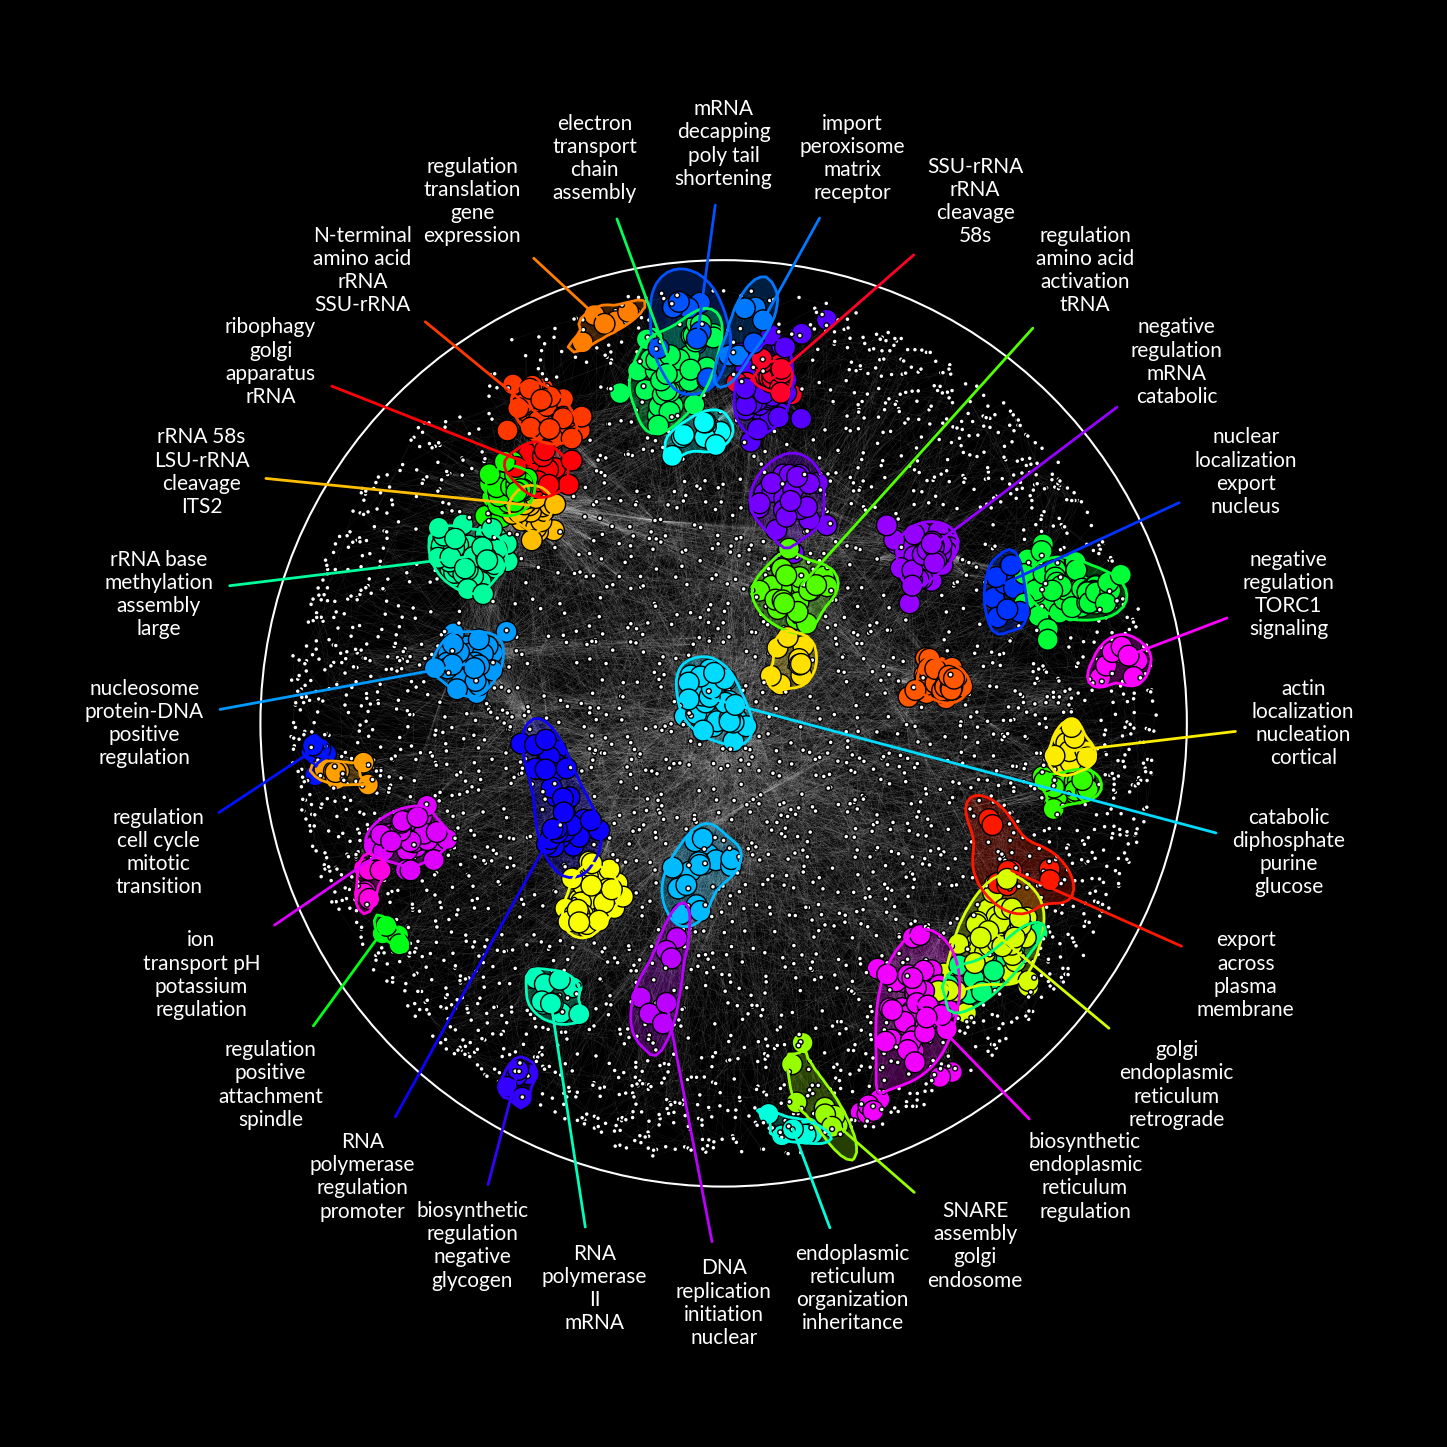

In [119]:
# Set random seed for reproducibility
random_seed = 705

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        significant_size=225,
        nonsignificant_size=12.5,
    ),
    node_shape="o",
    node_edgewidth=1.0,
    edge_width=0.03,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        color=None,
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        alpha=1.0,
        nonsignificant_color="white",
        nonsignificant_alpha=0.75,
        ids_to_colors={
            10: "#f200ff",
            32: "#fcec00",
        },
        random_seed=random_seed,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# Plot KDE-based contours around network nodes
plotter.plot_contours(
    levels=5,
    bandwidth=.8,
    grid_size=250,
    color=plotter.get_annotated_contour_colors(
        cmap="gist_rainbow",
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        ids_to_colors={
            10: "#f200ff",
            32: "#fcec00",
        },
        random_seed=random_seed,
    ),
    linestyle="solid",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.25,
)

# Plot labels on the network
plotter.plot_labels(
    scale=1.1,
    offset=0.12,
    font="Lato",
    fontcase={"title": "lower"},
    fontsize=15,
    fontcolor="white",
    fontalpha=1.0,
    arrow_linewidth=2.0,
    arrow_style="-",
    arrow_color=plotter.get_annotated_label_colors(
        cmap="gist_rainbow",
        color=None,
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        ids_to_colors={
            10: "#f200ff",
            32: "#fcec00",
        },
        random_seed=random_seed,
    ),
    arrow_alpha=1.0,
    arrow_base_shrink=10.0,
    arrow_tip_shrink=0.0,
    max_labels=28,
    min_label_lines=2,
    max_label_lines=4,
    min_chars_per_line=2,
    max_chars_per_line=12,
    words_to_omit=[
        "1-",
        "ci",
        "via",
        "process",
        "protein",
        "response",
        "termination",
        "disassembly",
        "increased",
        "decreased",
        "cellular",
        "compound",
        "metabolic",
        "reduction",
        "complex",
    ],
    overlay_ids=False,
    ids_to_keep=[
        1,
        6,
        8,
        9,
        10,
        15,
        16,
        17,
        18,
        19,
        22,
        24,
        27,
        32,
        33,
        34,
        36,
        37,
        38,
        40,
        41,
        42,
        43,
        44,
        45,
        46,
        48,
        53,
    ],
    ids_to_labels=None,
)

# Save fig in publication folder
# 350 DPI required for journal Bioinformatics
plotter.savefig("./png/fig_1a.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S2.A

Empty yeast protein–protein interaction (PPI) network.

---------------
Loading plotter
---------------


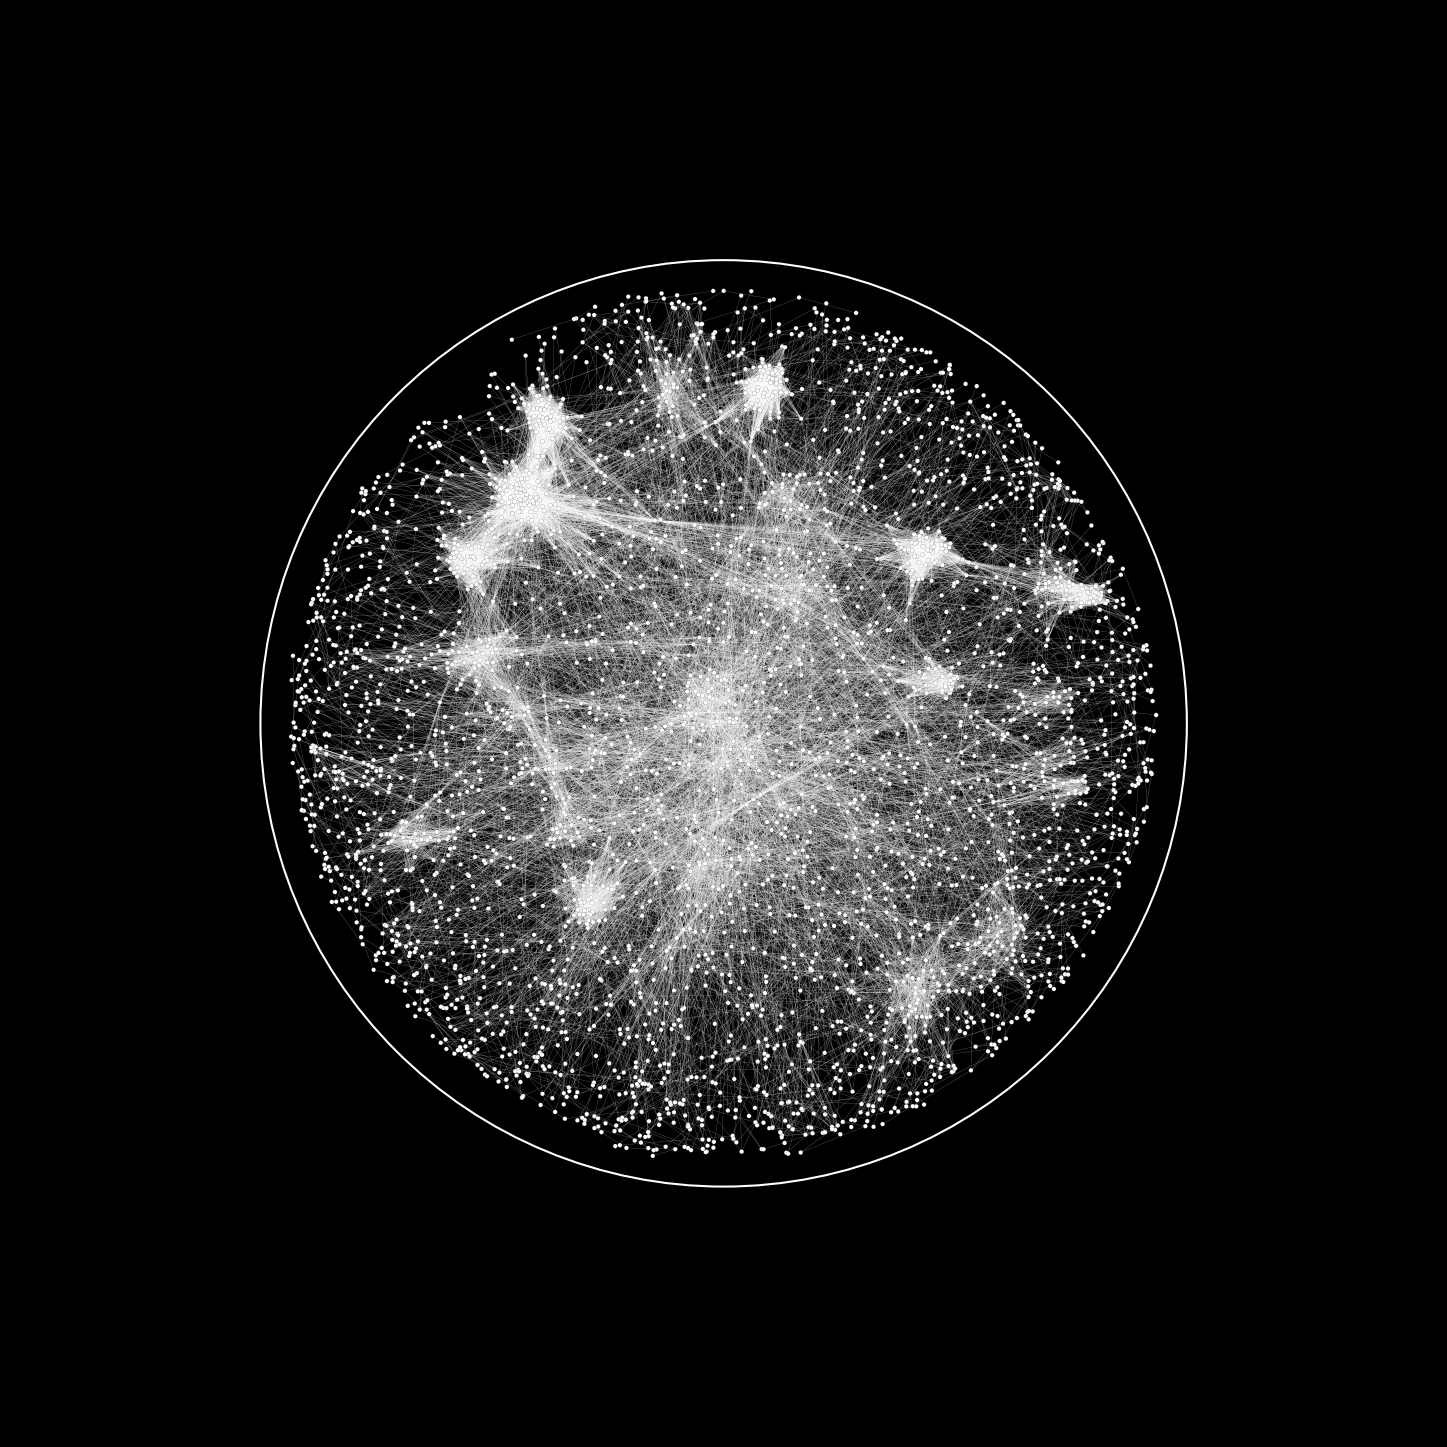

In [120]:
# Set random seed for reproducibility
random_seed = 705

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        significant_size=10,
        nonsignificant_size=10,
    ),
    node_shape="o",
    node_edgewidth=0.1,
    edge_width=0.1,
    node_color="white",
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_2a.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S2.B

Yeast protein–protein interaction (PPI) network clustered with RISK.  
Nodes annotated with GO BP terms.

---------------
Loading plotter
---------------


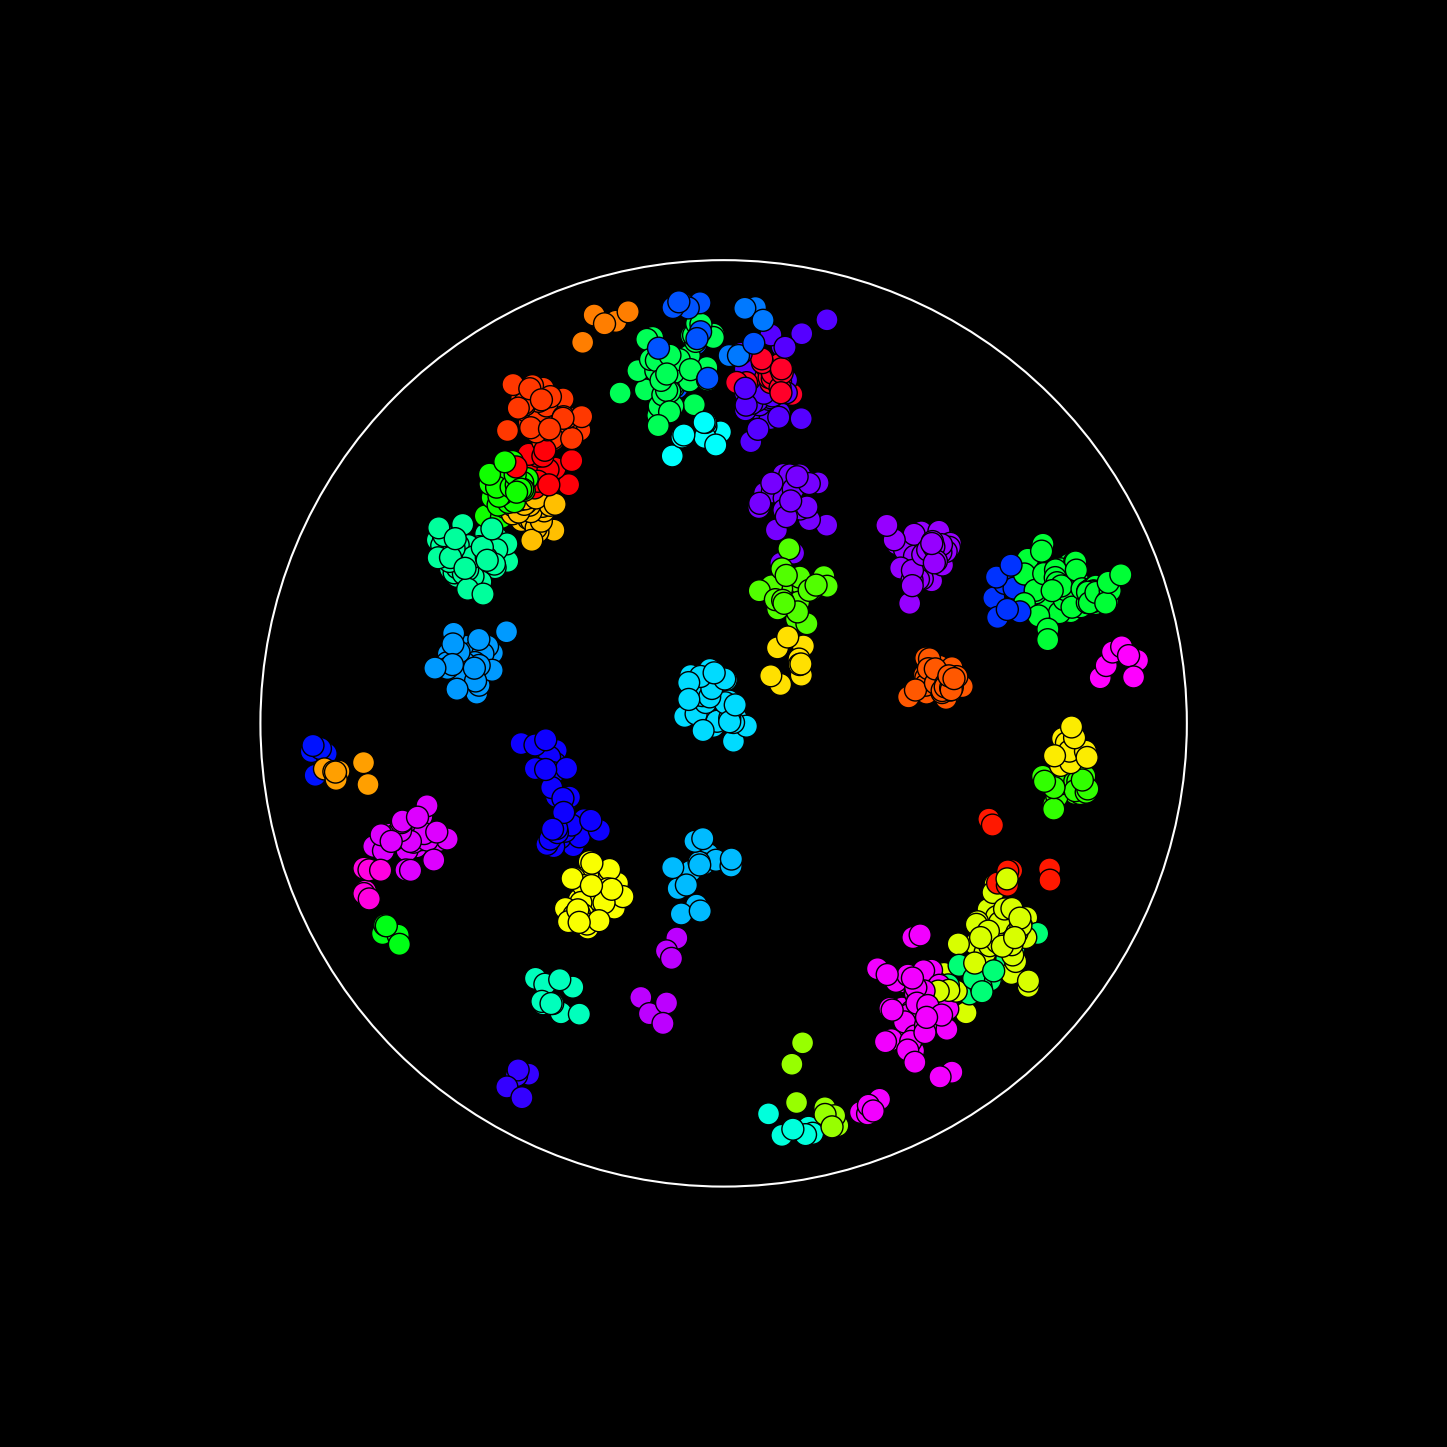

In [498]:
# Set random seed for reproducibility
random_seed = 705

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        significant_size=250,
        nonsignificant_size=0,
    ),
    node_shape="o",
    node_edgewidth=1.0,
    edge_width=0.0,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        color=None,
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        alpha=1.0,
        nonsignificant_color="white",
        nonsignificant_alpha=0.75,
        ids_to_colors={
            10: "#f200ff",
            32: "#fcec00",
        },
        random_seed=random_seed,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_2b.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S2.D  

Comparison of RISK and SAFE on the yeast protein–protein interaction (PPI) network.  
Bar plot shows number of clusters and clustering quality metrics.

In [457]:
import matplotlib.pyplot as plt


# Set the background to black for all plots
plt.rcParams["figure.facecolor"] = "black"  # Set the figure background color
plt.rcParams["axes.facecolor"] = "black"  # Set the axes background color
plt.rcParams["savefig.facecolor"] = "black"  # Set the background for saved figures
plt.rcParams["axes.edgecolor"] = "white"  # Optional: Make the axis edge white for visibility
plt.rcParams["axes.labelcolor"] = "white"  # Optional: Make axis labels white
plt.rcParams["xtick.color"] = "white"  # Optional: Make x-ticks white
plt.rcParams["ytick.color"] = "white"  # Optional: Make y-ticks white
plt.rcParams["text.color"] = "white"  # Optional: Set text color to white

In [458]:
import json


def read_json_from_file(filename):
    with open(filename, "r") as file:
        return json.load(file)


def write_json_to_file(data, filename):
    with open(filename, "w") as file:
        json.dump(data, file, indent=4)

In [459]:
# Define base network to use as a reference for distance-related analyses

base_network = graph.network.copy()

In [460]:
# Get RISK domain to ids

risk_domain_to_ids_map = graph.domain_id_to_node_ids_map
risk_domain_to_labels_map = graph.domain_id_to_node_labels_map
print(f"Number of domains in RISK: {len(risk_domain_to_ids_map)}")


Number of domains in RISK: 41


In [540]:
# Get SAFE domain to ids, filtering only nodes present in RISK

# Read the JSON file and load it into a Python dictionary
with open(
    "../safe_network/data/json/domains/20250904_safe_domains_michaelis_2023_full.json", "r"
) as json_file:
    # Keys are domains, values are already labels
    safe_domain_to_labels_map = {int(k): v for k, v in json.load(json_file).items()}

    # Remove domain 0 (garbage collection)
    safe_domain_to_labels_map.pop(0, None)

    # Filter SAFE domains to only include nodes that exist in RISK
    safe_domain_to_ids_map = {
        domain: [
            graph.node_label_to_node_id_map[label]
            for label in labels
            if label in graph.node_label_to_node_id_map
        ]
        for domain, labels in safe_domain_to_labels_map.items()
    }

    # Regenerate labels after filtering to ensure consistency
    safe_domain_to_labels_map = {
        domain: [
            graph.node_id_to_node_label_map[node_id]
            for node_id in node_ids
            if node_id in graph.node_id_to_node_label_map
        ]
        for domain, node_ids in safe_domain_to_ids_map.items()
    }

print(f"Number of domains in SAFE: {len(safe_domain_to_ids_map)}")


Number of domains in SAFE: 22


In [541]:
from itertools import combinations
import numpy as np
from sklearn.metrics import silhouette_score


def calculate_network_diameter(network, exact=False):
    """
    Calculate the network diameter (maximum Euclidean distance) efficiently.
    """
    positions = np.array([[node_data["x"], node_data["y"]] for node_data in network.nodes.values()])

    if not exact:
        # Approximation using bounding box
        min_x, max_x = positions[:, 0].min(), positions[:, 0].max()
        min_y, max_y = positions[:, 1].min(), positions[:, 1].max()

        # Compute distances between extreme points of the bounding box
        extreme_points = [[min_x, min_y], [min_x, max_y], [max_x, min_y], [max_x, max_y]]
        max_distance = max(
            np.linalg.norm(np.array(p1) - np.array(p2))
            for p1, p2 in combinations(extreme_points, 2)
        )
    else:
        # Exact calculation for all pairs (O(n^2))
        max_distance = max(
            np.linalg.norm(positions[i] - positions[j])
            for i, j in combinations(range(len(positions)), 2)
        )

    return max_distance


def calculate_clustering_metrics(network, domain_to_ids_map, network_diameter=None):
    """
    Compute compactness, separation, and silhouette scores for network clusters.
    """
    compactness_scores = {}
    separation_scores = {}

    # Initialize lists for silhouette score calculation
    X = []  # List of node positions
    labels = []  # Corresponding list of cluster labels for each node

    # Compute network diameter if not provided
    if network_diameter is None:
        network_diameter = calculate_network_diameter(network, exact=False)

    # Ensure we don't divide by zero
    if network_diameter == 0:
        network_diameter = 1.0

    # Calculate compactness and separation
    centroids = {}
    for domain, node_ids in domain_to_ids_map.items():
        positions = np.array(
            [[network.nodes[node_id]["x"], network.nodes[node_id]["y"]] for node_id in node_ids]
        )

        # Compactness: Average pairwise distance within each cluster (normalized)
        if len(positions) > 1:
            pairwise_distances = [
                np.linalg.norm(positions[i] - positions[j])
                for i, j in combinations(range(len(positions)), 2)
            ]
            compactness_scores[domain] = np.mean(pairwise_distances) / network_diameter
        else:
            compactness_scores[domain] = 0  # Single-node clusters have 0 compactness by definition

        # Compute centroid for separation calculation
        centroids[domain] = np.mean(positions, axis=0)

        # Collect positions and labels for silhouette score calculation
        for pos in positions:
            X.append(pos)
            labels.append(domain)

    # Convert X and labels to NumPy arrays for consistency
    X = np.array(X)
    labels = np.array(labels)

    # Calculate separation: Minimum distance to other cluster centroids (normalized)
    for domain, centroid in centroids.items():
        other_centroids = [centroids[other] for other in centroids if other != domain]
        if other_centroids:
            min_separation = min(
                np.linalg.norm(centroid - other_centroid) for other_centroid in other_centroids
            )
            separation_scores[domain] = min_separation / network_diameter
        else:
            separation_scores[domain] = 0  # Only one cluster case

    # Calculate overall silhouette score
    overall_silhouette_score = silhouette_score(X, labels)

    # Return metrics
    return {
        "compactness": compactness_scores,
        "separation": separation_scores,
        "silhouette_score": overall_silhouette_score,
    }

In [542]:
# RISK

# Precompute network diameter
risk_network_diameter = calculate_network_diameter(base_network, exact=False)
# Calculate clustering metrics
risk_metrics = calculate_clustering_metrics(
    base_network, risk_domain_to_ids_map, network_diameter=risk_network_diameter
)

# print("Compactness per cluster:", risk_metrics['compactness'])
# print("Separation per cluster:", risk_metrics['separation'])
print("Overall Silhouette Score:", risk_metrics["silhouette_score"])

Overall Silhouette Score: 0.4456250165446642


In [543]:
# SAFE

# Precompute network diameter
safe_network_diameter = calculate_network_diameter(base_network, exact=False)
# Calculate clustering metrics
safe_metrics = calculate_clustering_metrics(
    base_network, safe_domain_to_ids_map, network_diameter=safe_network_diameter
)

# print("Compactness per cluster:", risk_metrics['compactness'])
# print("Separation per cluster:", risk_metrics['separation'])
print("Overall Silhouette Score:", safe_metrics["silhouette_score"])

Overall Silhouette Score: 0.40430426345650516


In [544]:
# This script compares clustering metrics (compactness and separation) between RISK and SAFE.
# It selects the top N clusters based on compactness for each tool, where N is the maximum common cluster count.
# Metrics are then recalculated and summarized as means and standard deviations for compactness and separation.
# Assumes `safe_metrics` and `risk_metrics` are precomputed dictionaries with 'compactness', 'separation',
# and 'silhouette_score' as keys and domain-specific metrics as values.

import numpy as np

# Assume safe_metrics and risk_metrics have already been calculated
safe_compactness = safe_metrics["compactness"]
risk_compactness = risk_metrics["compactness"]
safe_separation = safe_metrics["separation"]
risk_separation = risk_metrics["separation"]
safe_silhouette = safe_metrics["silhouette_score"]
risk_silhouette = risk_metrics["silhouette_score"]

# Determine the max count of clusters between SAFE and RISK
max_cluster_count = min(len(safe_compactness), len(risk_compactness))

# Sort and select top N clusters based on compactness
top_safe_compactness = dict(
    sorted(safe_compactness.items(), key=lambda item: item[1])[:max_cluster_count]
)
top_risk_compactness = dict(
    sorted(risk_compactness.items(), key=lambda item: item[1])[:max_cluster_count]
)

top_safe_separation = {domain: safe_separation[domain] for domain in top_safe_compactness}
top_risk_separation = {domain: risk_separation[domain] for domain in top_risk_compactness}

# Re-calculate the means of the selected top clusters
safe_compactness_mean = np.mean(list(top_safe_compactness.values()))
safe_compactness_std = np.std(list(top_safe_compactness.values()))
risk_compactness_mean = np.mean(list(top_risk_compactness.values()))
risk_compactness_std = np.std(list(top_risk_compactness.values()))

safe_separation_mean = np.mean(list(top_safe_separation.values()))
safe_separation_std = np.std(list(top_safe_separation.values()))
risk_separation_mean = np.mean(list(top_risk_separation.values()))
risk_separation_std = np.std(list(top_risk_separation.values()))

# Print results
print("Top N SAFE Compactness (mean, std):", safe_compactness_mean, safe_compactness_std)
print("Top N RISK Compactness (mean, std):", risk_compactness_mean, risk_compactness_std)
print("Top N SAFE Separation (mean, std):", safe_separation_mean, safe_separation_std)
print("Top N RISK Separation (mean, std):", risk_separation_mean, risk_separation_std)

Top N SAFE Compactness (mean, std): 0.048475532897239805 0.025874191096612303
Top N RISK Compactness (mean, std): 0.017954653694069612 0.0033540905359855312
Top N SAFE Separation (mean, std): 0.05844502527773776 0.02983228669969433
Top N RISK Separation (mean, std): 0.04872922205548227 0.022385946856628185


# SAFE Groups: 22 : # RISK Groups: 41
Compactness Mann-Whitney U: U=804.0, p-value=1.864896917359629e-07
Separation Mann-Whitney U: U=484.0, p-value=0.6854913447050783
Silhouette Score Mann-Whitney U: U=0.0, p-value=1.0


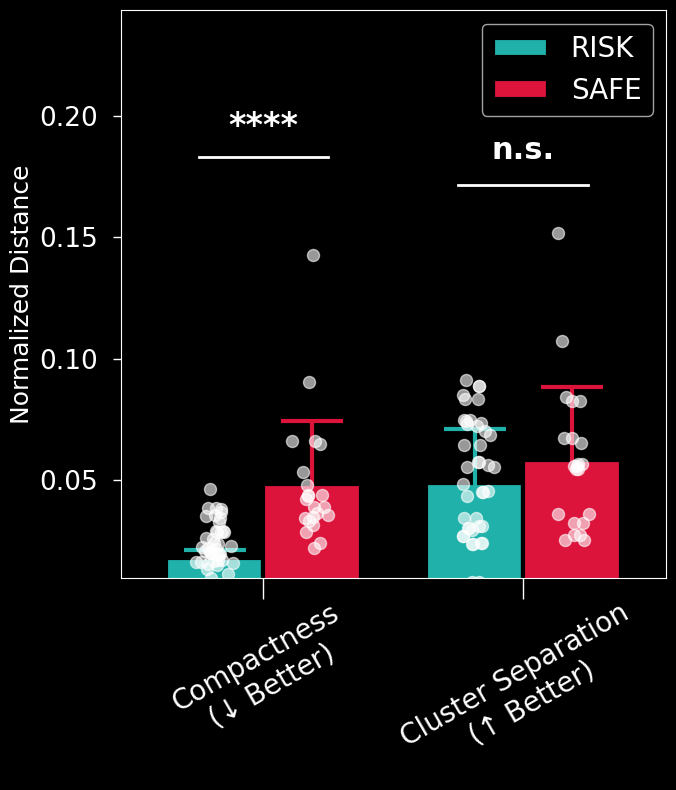

In [559]:
# This script generates a comparative bar chart and scatter plot to visualize clustering metrics 
# (compactness, separation, silhouette score) for SAFE and RISK. It includes statistical significance 
# testing using the Mann-Whitney U test to assess differences between the tools. Annotations highlight 
# significant results directly on the plot. This visualization is tailored for publication-quality 
# figures and supports a critical evaluation of clustering performance across metrics.

# Key Features:
# 1. Bar chart with error bars for compactness and separation.
# 2. Scatter points for silhouette scores.
# 3. Jittered scatter points overlaid on bars to represent individual cluster metrics.
# 4. Mann-Whitney U test results annotated for significance.
# 5. Flexible y-axis range adjustment and aesthetic customization for publication readiness.

# Inputs:
# - Precomputed SAFE and RISK metrics (compactness, separation, silhouette scores).
# - Statistical significance thresholds for Mann-Whitney U test annotations.

# Outputs:
# - Comparative bar chart with significance annotations.
# - Printout of Mann-Whitney U test results for compactness, separation, and silhouette score.

from matplotlib.ticker import MultipleLocator
from scipy.stats import mannwhitneyu


np.random.seed(705)

# Example data (replace with actual values)
metrics = [
    "Compactness\n(↓ Better)",
    "Cluster Separation\n(↑ Better)",
    "Silhouette Score\n(↑ Better)",
]
safe_means = [safe_compactness_mean, safe_separation_mean, safe_silhouette]
safe_stds = [safe_compactness_std, safe_separation_std, 0]  # No std deviation for silhouette
risk_means = [risk_compactness_mean, risk_separation_mean, risk_silhouette]
risk_stds = [risk_compactness_std, risk_separation_std, 0]  # No std deviation for silhouette

print(f"# SAFE Groups: {len(safe_compactness)} : # RISK Groups: {len(risk_compactness)}")
safe_data = [list(safe_compactness.values()), list(safe_separation.values()), [safe_silhouette]]
risk_data = [list(risk_compactness.values()), list(risk_separation.values()), [risk_silhouette]]

# Bar chart settings
fig, ax = plt.subplots(figsize=(8, 8))
bar_width = 0.375
x = np.arange(len(metrics) - 1)

safe_color = "#DC143C"  # Crimson for SAFE
risk_color = "#20B2AA"  # Light Sea Green for RISK

# Plot RISK bars first (swap positions with SAFE)
ax.bar(
    x - bar_width / 2,
    risk_means[:2],
    bar_width,
    yerr=risk_stds[:2],
    color=risk_color,
    edgecolor="black",
    linewidth=3,
    capsize=22,
    label="RISK",
    error_kw=dict(ecolor=risk_color, lw=3, capthick=3),
)
ax.bar(
    x + bar_width / 2,
    safe_means[:2],
    bar_width,
    yerr=safe_stds[:2],
    color=safe_color,
    edgecolor="black",
    linewidth=3,
    capsize=22,
    label="SAFE",
    error_kw=dict(ecolor=safe_color, lw=3, capthick=3),
)

# Overlay white jittered scatter points with transparency for RISK
for i, data in enumerate(risk_data[:2]):
    jitter = np.random.normal(0, 0.03, len(data))  # Small jitter
    ax.scatter(
        np.full(len(data), x[i] - bar_width / 2) + jitter,
        data,
        color="white",
        s=75,
        alpha=0.6,
        zorder=3,
    )

# Overlay white jittered scatter points with transparency for SAFE
for i, data in enumerate(safe_data[:2]):
    jitter = np.random.normal(0, 0.03, len(data))  # Small jitter
    ax.scatter(
        np.full(len(data), x[i] + bar_width / 2) + jitter,
        data,
        color="white",
        s=75,
        alpha=0.6,
        zorder=3,
    )

# Customizations
ax.axhline(
    0, color="white", linewidth=1.5, linestyle="--"
)  # Solid white line at y=0 as reference point
ax.set_xticks(
    np.append(x, x[-1] + 1)
)  # Adjust x-axis ticks to include the silhouette score position
ax.set_xticklabels(metrics, fontsize=20)  # Set x-axis label font size

# Extend x and y tick marks
ax.tick_params(axis="x", pad=0, length=15, width=1)  # Extend x-axis tick marks towards labels
ax.tick_params(axis="y", pad=10, length=6, width=1)  # Extend y-axis tick marks towards labels

# CHANGE HERE FOR YLIM
correction = (max(safe_data[0]) - min(safe_data[0])) - 0.02
ax.set_ylim(0.01, max(safe_data[0]) + correction)  # Adjust the y-axis range as needed
ax.legend(loc="upper right", fontsize=20)  # Increase legend font size
# Set the y-axis tick interval
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_ylabel("Normalized Distance", fontsize=18)
ax.tick_params(axis="y", labelsize=19)  # Customize y-tick font size

plt.xticks(rotation=30)  # Rotate x-tick labels
plt.tight_layout()
# Create a 5% (0.05) and 10% (0.1) padding in the
# x and y directions respectively.
plt.margins(0.1, 0)

# Convert compactness and separation to lists of numeric values
safe_compactness_values = list(safe_compactness.values())
risk_compactness_values = list(risk_compactness.values())
safe_separation_values = list(safe_separation.values())
risk_separation_values = list(risk_separation.values())

# Perform Mann-Whitney U test for each metric
compactness_stat, compactness_p = mannwhitneyu(
    safe_compactness_values, risk_compactness_values, alternative="greater"
)
separation_stat, separation_p = mannwhitneyu(
    safe_separation_values, risk_separation_values, alternative="less"
)
silhouette_stat, silhouette_p = mannwhitneyu(
    [safe_metrics["silhouette_score"]], [risk_metrics["silhouette_score"]], alternative="two-sided"
)

# Print results
print(f"Compactness Mann-Whitney U: U={compactness_stat}, p-value={compactness_p}")
print(f"Separation Mann-Whitney U: U={separation_stat}, p-value={separation_p}")
print(f"Silhouette Score Mann-Whitney U: U={silhouette_stat}, p-value={silhouette_p}")

# Define significance thresholds
significance_annotations = {
    "****": 0.0001,
    "***": 0.001,
    "**": 0.01,
    "*": 0.05,
}


def get_significance_text(p_value):
    for text, threshold in significance_annotations.items():
        if p_value <= threshold:
            return text
    return "n.s."  # Not significant


# Get significance text for each metric
compactness_text = get_significance_text(compactness_p)
separation_text = get_significance_text(separation_p)

# Annotate significance on the plot
safe_compactness_height = max(safe_compactness_values) + 0.04
ax.text(
    0,
    safe_compactness_height + 0.006,
    compactness_text,
    ha="center",
    va="bottom",
    color="white",
    weight="bold",
    fontsize=24,
)
ax.plot(
    [-0.25, 0.25], [safe_compactness_height, safe_compactness_height], color="white", linewidth=2
)

risk_separation_height = max(safe_separation_values) + 0.02
ax.text(
    1,
    risk_separation_height + 0.008,
    separation_text,
    ha="center",
    va="bottom",
    color="white",
    weight="bold",
    fontsize=22,
)
ax.plot([0.75, 1.25], [risk_separation_height, risk_separation_height], color="white", linewidth=2)

# 1,200 DPI required for line art in journal Bioinformatics
# plt.savefig("./png/supp_fig_2d.png", bbox_inches="tight", dpi=1200)

plt.show()

## Supplementary Figure S4

Comparison of RISK and SAFE domain analyses on the yeast protein–protein interaction (PPI) network.  
Contours show significant domains, with unique regions highlighted for each method.

In [509]:
import json

# Get RISK domain to ids/labels (from graph object)
risk_domain_to_ids_map = graph.domain_id_to_node_ids_map
risk_domain_to_labels_map = graph.domain_id_to_node_labels_map
print(f"Number of domains in RISK: {len(risk_domain_to_ids_map)}")

# Get SAFE domain to ids/labels
with open(
    "../safe_network/data/json/domains/20250904_safe_domains_michaelis_2023_full.json", "r"
) as json_file:
    # JSON now stores labels -> keep as labels
    safe_domain_to_labels_map = {int(k): v for k, v in json.load(json_file).items()}
    # Remove 0 domain (garbage collection)
    safe_domain_to_labels_map.pop(0, None)
    # Map labels back to node IDs
    safe_domain_to_ids_map = {
        k: [graph.node_label_to_node_id_map[label] for label in v if label in graph.node_label_to_node_id_map]
        for k, v in safe_domain_to_labels_map.items()
    }

print(f"Number of domains in SAFE: {len(safe_domain_to_ids_map)}")

Number of domains in RISK: 41
Number of domains in SAFE: 22


In [510]:
# Set global colors for RISK and SAFE

safe_color = "#DC143C"  # Crimson for SAFE
risk_color = "#20B2AA"  # Light Sea Green for RISK

## Supplementary Figure S4.A & S4.C

RISK and SAFE analyses of the yeast protein–protein interaction (PPI) network.  
Contour plots display all clusters with GO BP enrichment for each method.

---------------
Loading plotter
---------------


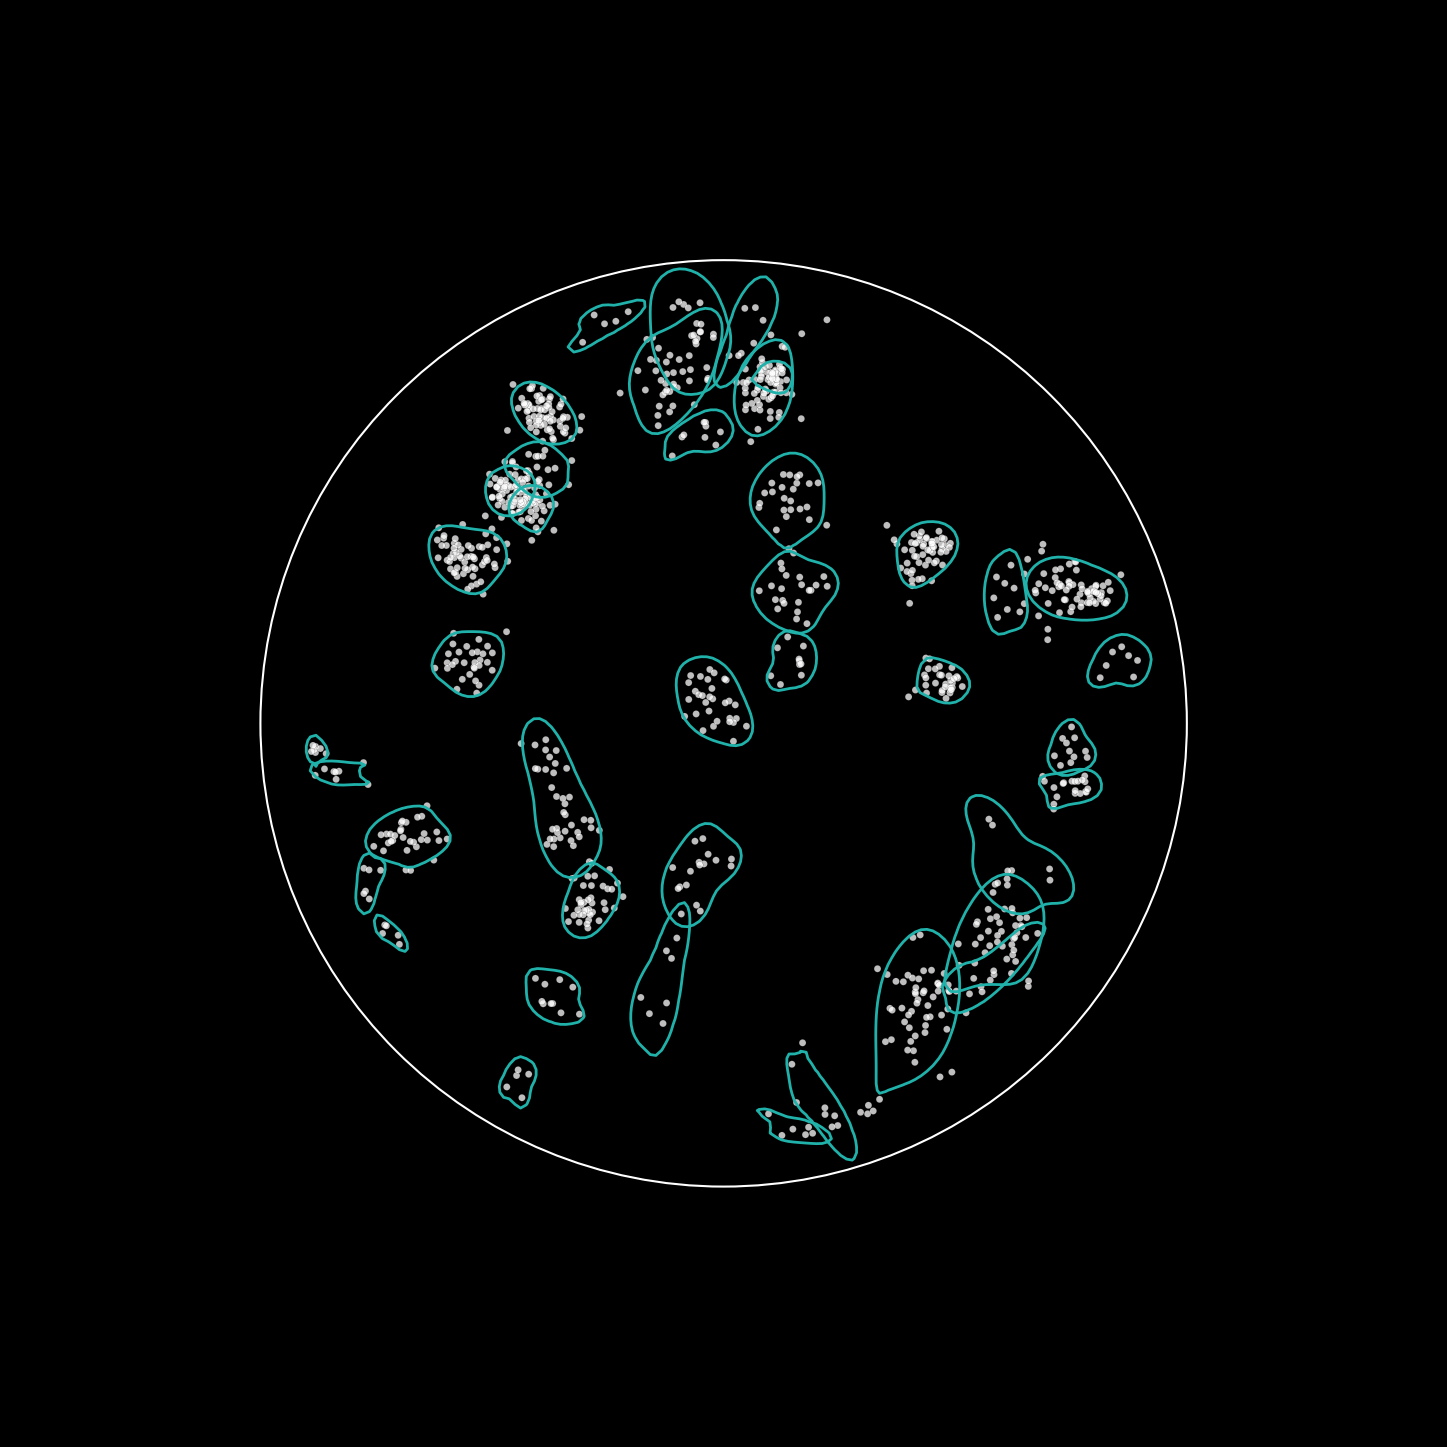

In [511]:
# RISK - ALL DOMAINS

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom network nodes and edges
plotter.plot_subnetwork(
    nodes=risk_domain_to_labels_map.values(),
    node_size=25,
    node_shape="o",
    node_edgewidth=0.1,
    node_color="white",
    node_edgecolor="black",
    node_alpha=0.75,
    edge_width=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
plotter.plot_subcontour(
    nodes=risk_domain_to_labels_map.values(),
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=risk_color,
    linestyle="solid",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_4a.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

---------------
Loading plotter
---------------


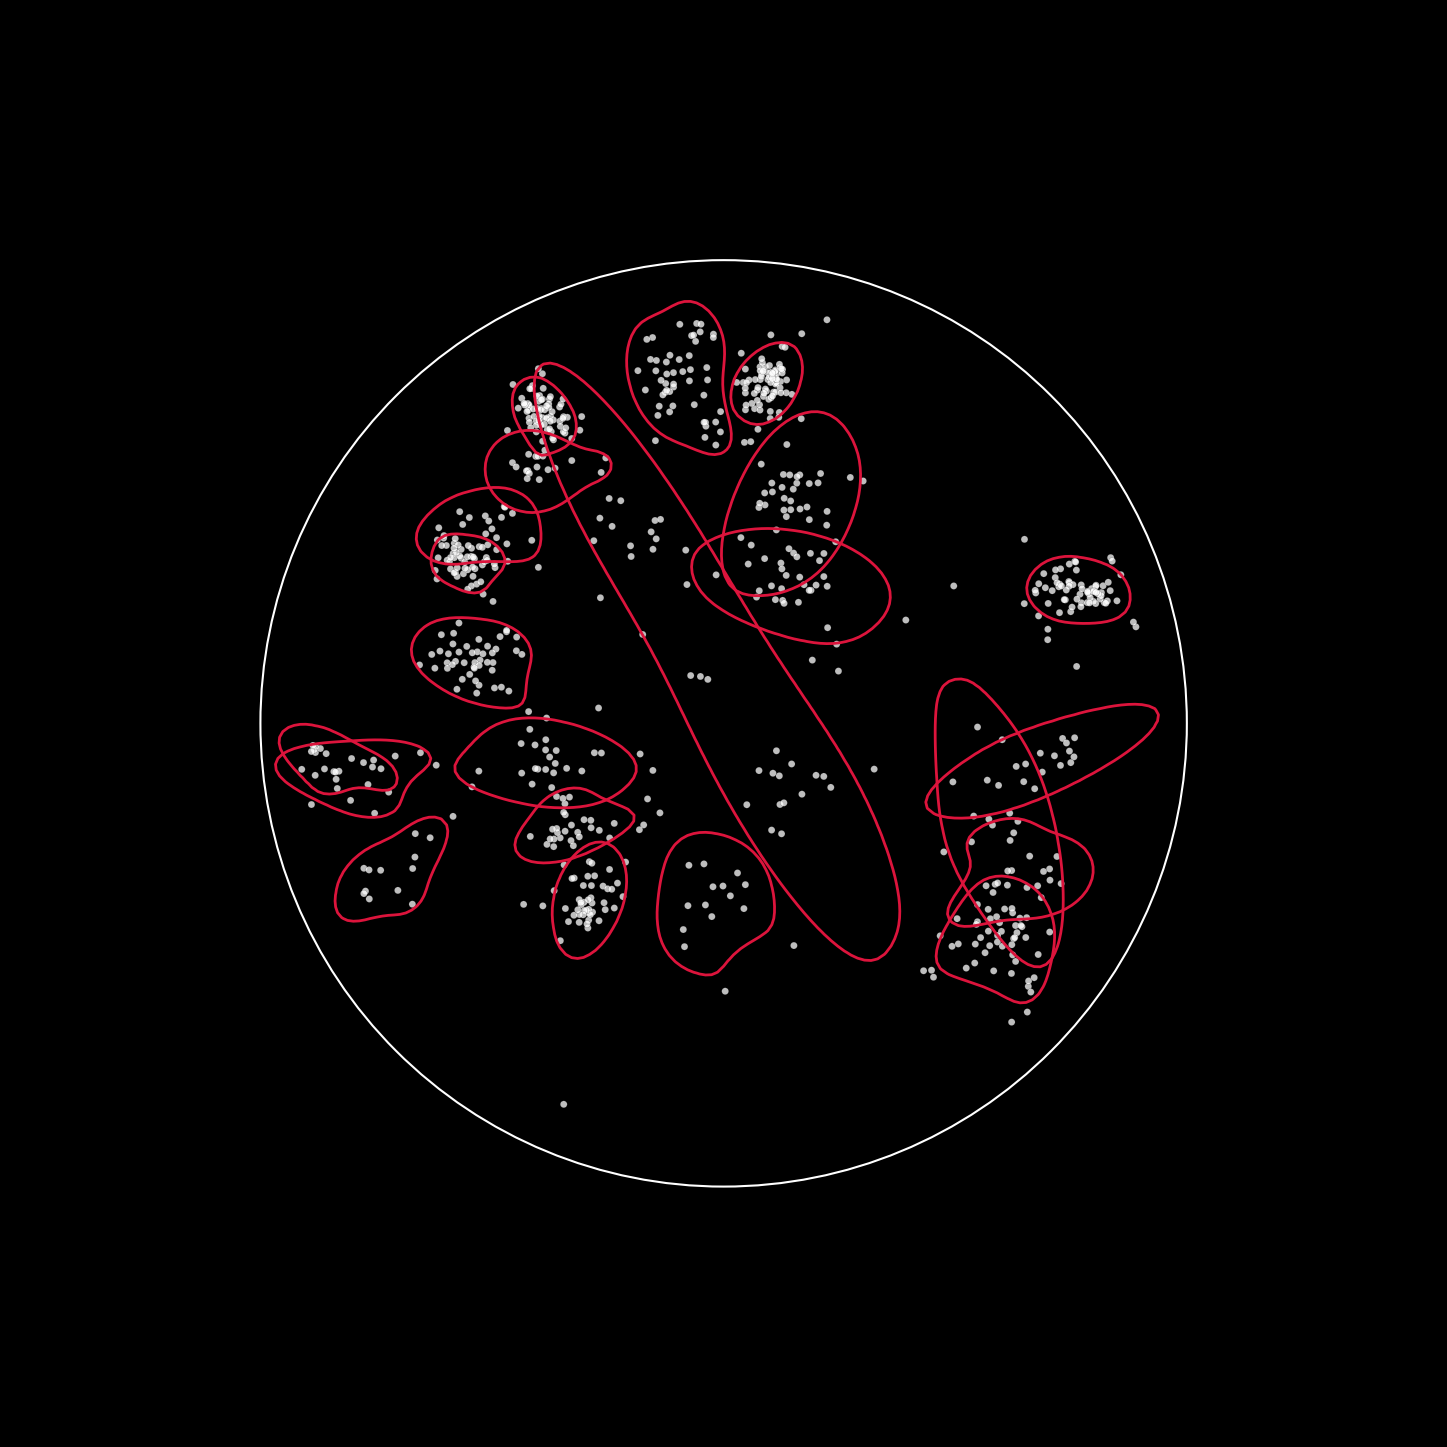

In [512]:
# SAFE - ALL DOMAINS

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom network nodes and edges
plotter.plot_subnetwork(
    nodes=safe_domain_to_labels_map.values(),
    node_size=25,
    node_shape="o",
    node_edgewidth=0.1,
    node_color="white",
    node_edgecolor="black",
    node_alpha=0.75,
    edge_width=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
plotter.plot_subcontour(
    nodes=safe_domain_to_labels_map.values(),
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=safe_color,
    linestyle="solid",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_4c.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S4.B & S4.D

RISK and SAFE analyses of the yeast protein–protein interaction (PPI) network.  
Plots show clusters unique to each method, retaining only nodes not overlapping with significant clusters from the other method.

In [513]:
# Compute the symmetric difference for each domain between SAFE and RISK

from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
import numpy as np

diff_domain_to_node = {}

for domain in set(safe_domain_to_ids_map.keys()).union(risk_domain_to_ids_map.keys()):
    safe_nodes = set(safe_domain_to_ids_map.get(domain, []))
    risk_nodes = set(risk_domain_to_ids_map.get(domain, []))

    # Compute symmetric difference: nodes unique to SAFE or RISK
    symmetric_diff = safe_nodes.symmetric_difference(risk_nodes)

    # Only keep non-empty symmetric differences
    if symmetric_diff:
        diff_domain_to_node[domain] = list(symmetric_diff)

In [514]:
# Step 1: Pool all node IDs from both SAFE and RISK
all_safe_nodes = set().union(*safe_domain_to_ids_map.values())
all_risk_nodes = set().union(*risk_domain_to_ids_map.values())

# Step 2: Identify the common nodes between SAFE and RISK across the entire dataset
common_nodes_pool = all_safe_nodes.intersection(all_risk_nodes)

# Step 3: Remove the common nodes from each domain's node lists in both SAFE and RISK
safe_domain_to_unique_ids_map = {}
risk_domain_to_unique_ids_map = {}

for domain in safe_domain_to_ids_map:
    unique_safe = set(safe_domain_to_ids_map[domain]) - common_nodes_pool
    if unique_safe:
        safe_domain_to_unique_ids_map[domain] = list(unique_safe)

for domain in risk_domain_to_ids_map:
    unique_risk = set(risk_domain_to_ids_map[domain]) - common_nodes_pool
    if unique_risk:
        risk_domain_to_unique_ids_map[domain] = list(unique_risk)

# Make mapping of domains to node labels
risk_domain_to_unique_labels_map = {
    k: [graph.node_id_to_node_label_map[v_] for v_ in v]
    for k, v in risk_domain_to_unique_ids_map.items()
}
safe_domain_to_unique_labels_map = {
    k: [graph.node_id_to_node_label_map[v_] for v_ in v]
    for k, v in safe_domain_to_unique_ids_map.items()
}

---------------
Loading plotter
---------------


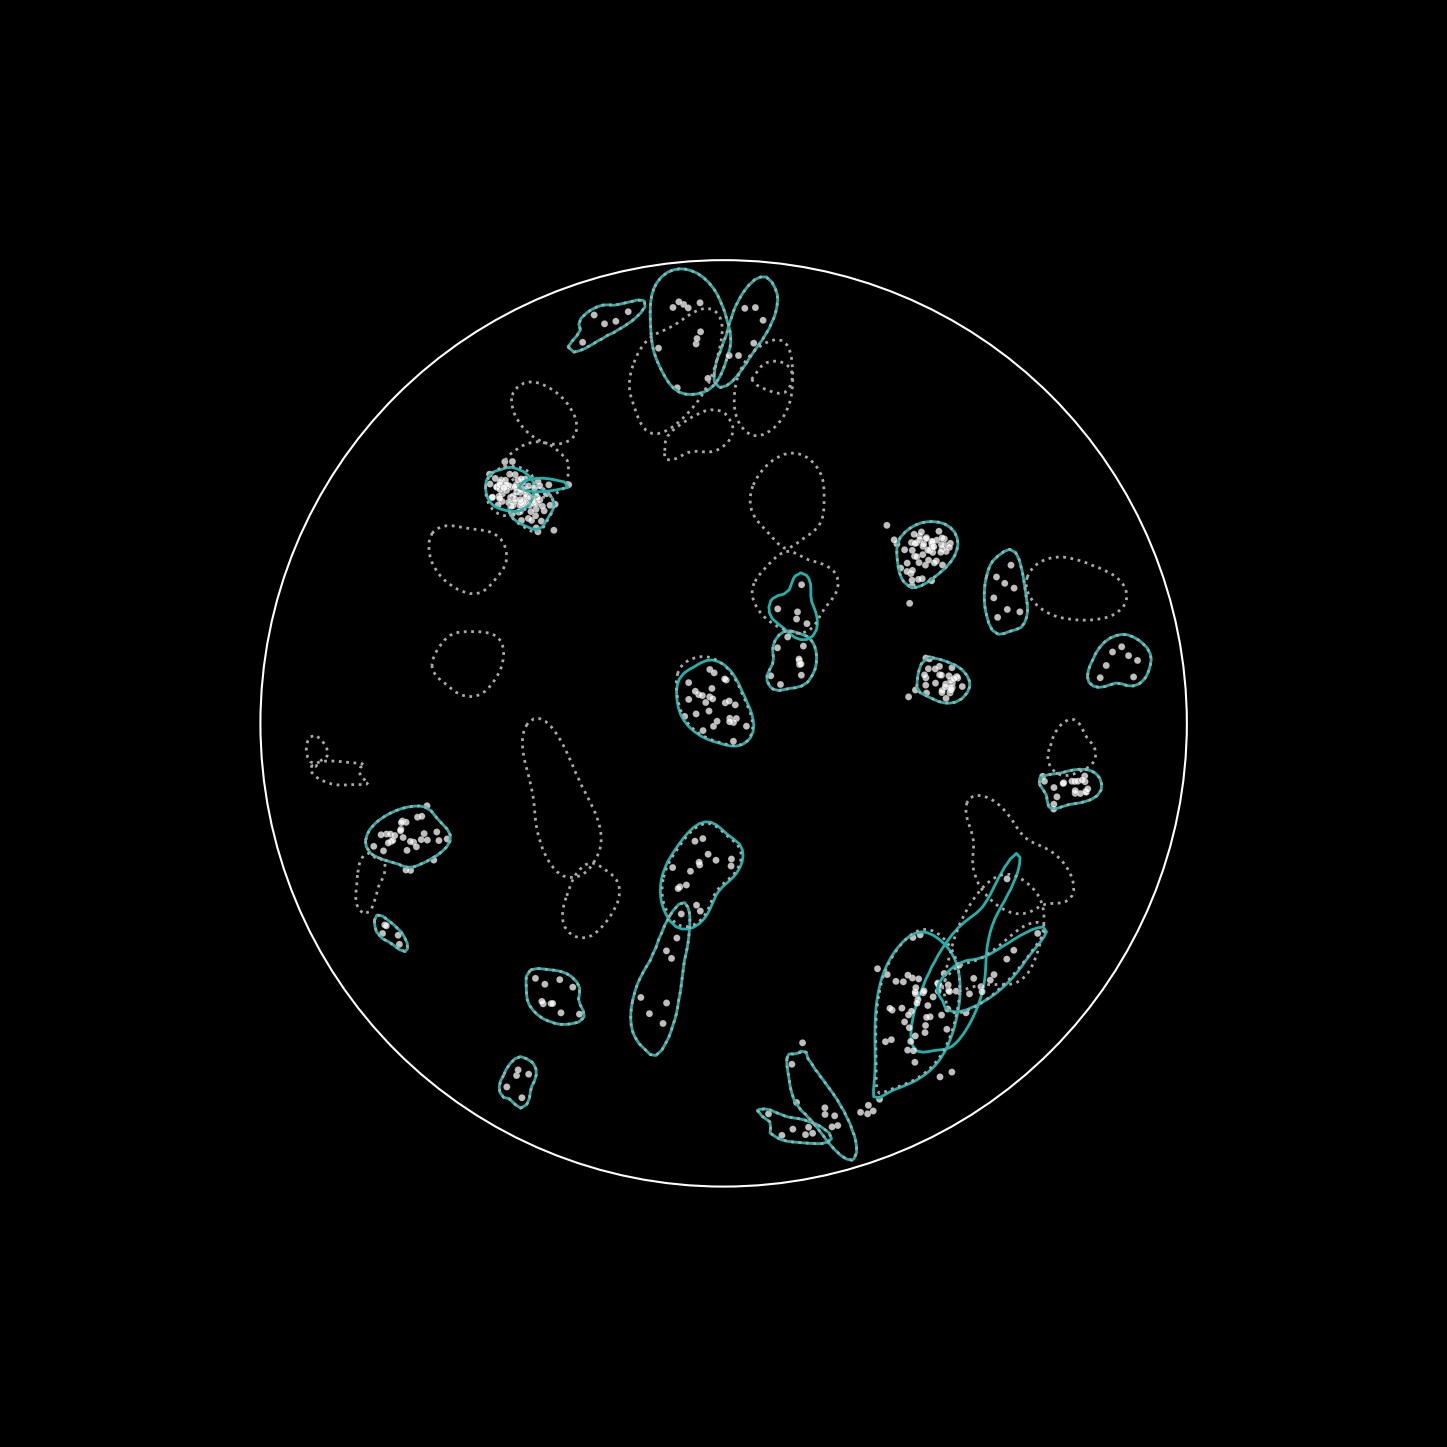

In [515]:
# RISK - UNIQUE DOMAINS

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
# Align with minimum GO BP member count and set minimum domain size to 5
for nodes in risk_domain_to_unique_labels_map.values():
    if len(nodes) < 5:
        continue
    try:
        plotter.plot_subnetwork(
            nodes=nodes,
            node_size=25,
            node_shape="o",
            node_edgewidth=0.1,
            node_color="white",
            node_edgecolor="black",
            node_alpha=0.75,
            edge_width=0.0,
        )
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=risk_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )
    except ValueError:
        continue

# Plot custom KDE-based contours around a subset of nodes
plotter.plot_subcontour(
    nodes=risk_domain_to_labels_map.values(),
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color="darkgrey",
    linestyle="dotted",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_4b.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

---------------
Loading plotter
---------------


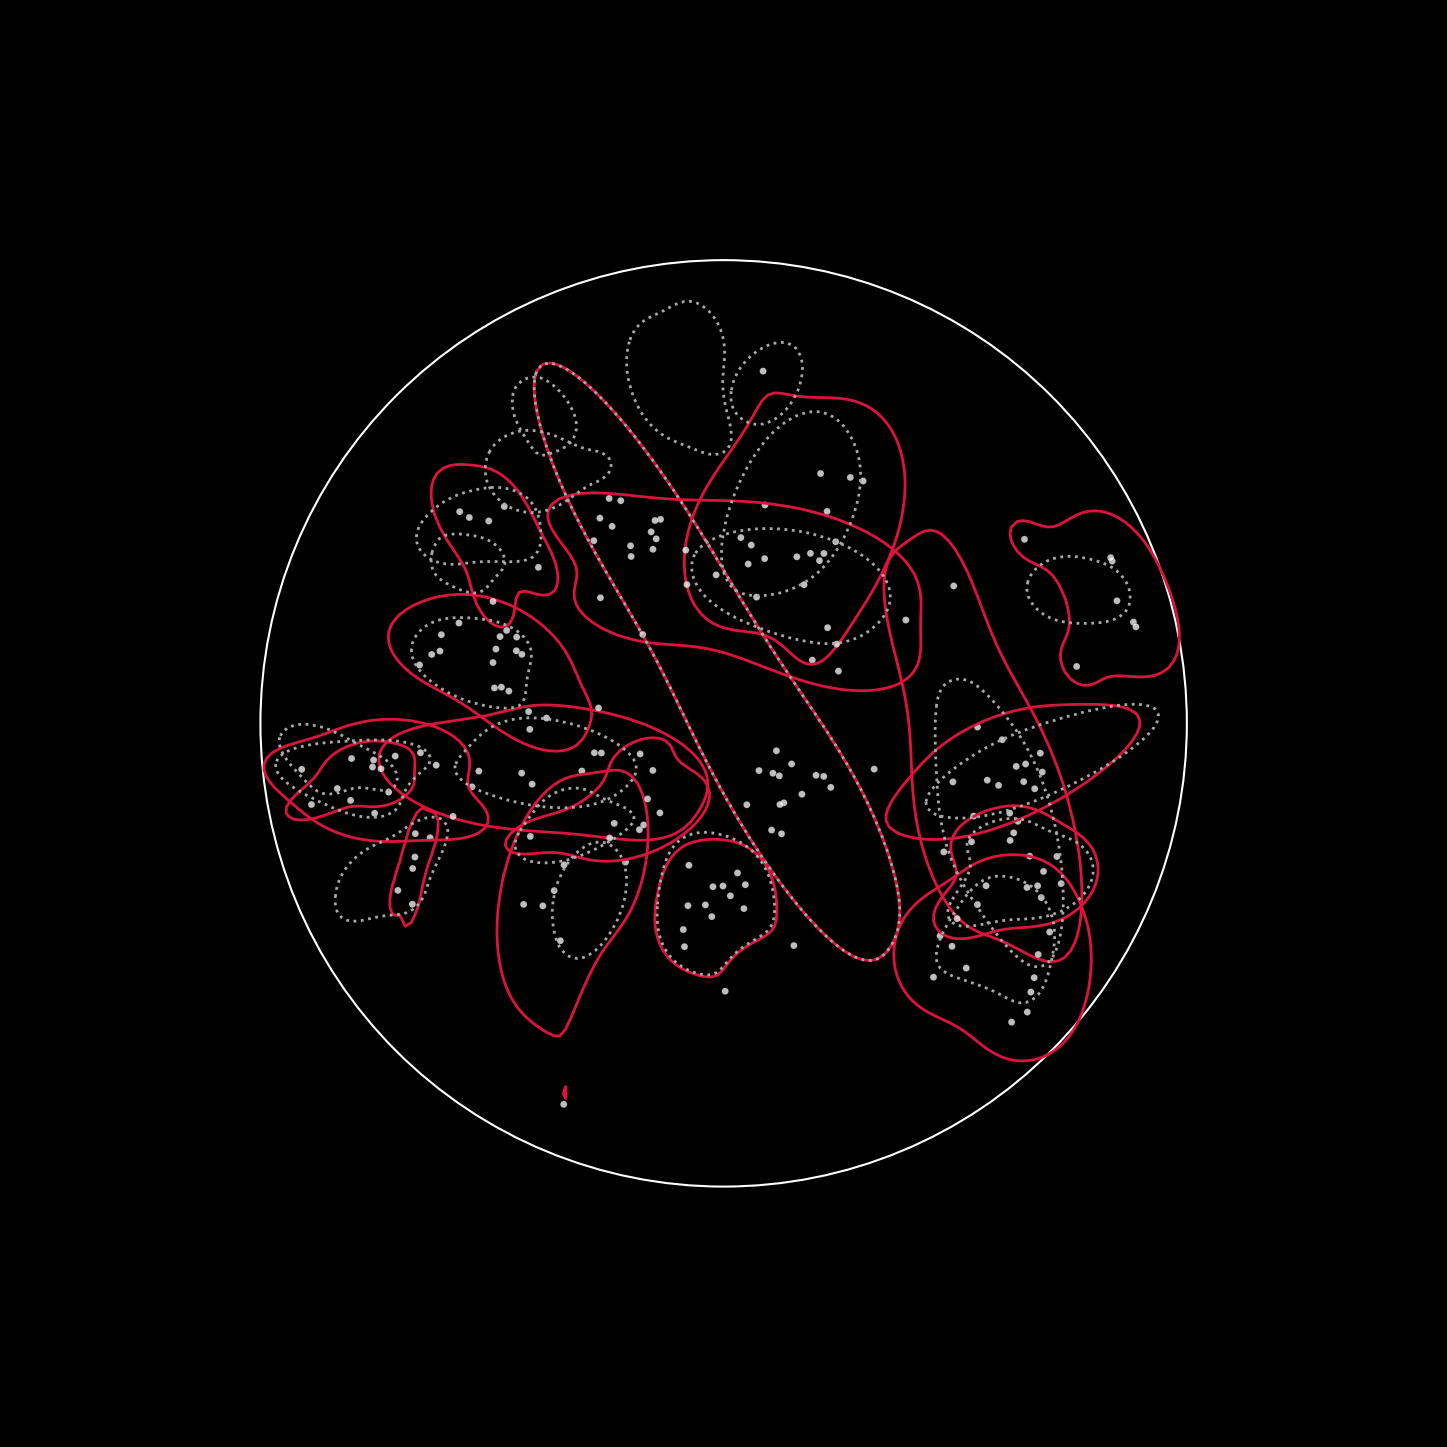

In [ ]:
# SAFE - UNIQUE DOMAINS

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
# Align with minimum GO BP member count and set minimum domain size to 5
for nodes in safe_domain_to_unique_labels_map.values():
    if len(nodes) < 5:
        continue
    try:
        plotter.plot_subnetwork(
            nodes=nodes,
            node_size=25,
            node_shape="o",
            node_edgewidth=0.1,
            node_color="white",
            node_edgecolor="black",
            node_alpha=0.75,
            edge_width=0.0,
        )
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=safe_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )
    except ValueError:
        continue
        
# Plot custom KDE-based contours around a subset of nodes
plotter.plot_subcontour(
    nodes=safe_domain_to_labels_map.values(),
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color="darkgrey",
    linestyle="dotted",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_4d.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S5

Most significantly enriched Gene Ontology Biological Process (GO BP) term identified by RISK for each cluster in the yeast protein–protein interaction (PPI) network (Michaelis et al., 2023).  
Network visualization shows 41 RISK clusters outlined in cyan, with accompanying tables listing the top enriched GO BP term per cluster (Cluster ID, term, P-value, FDR).

---------------
Loading plotter
---------------


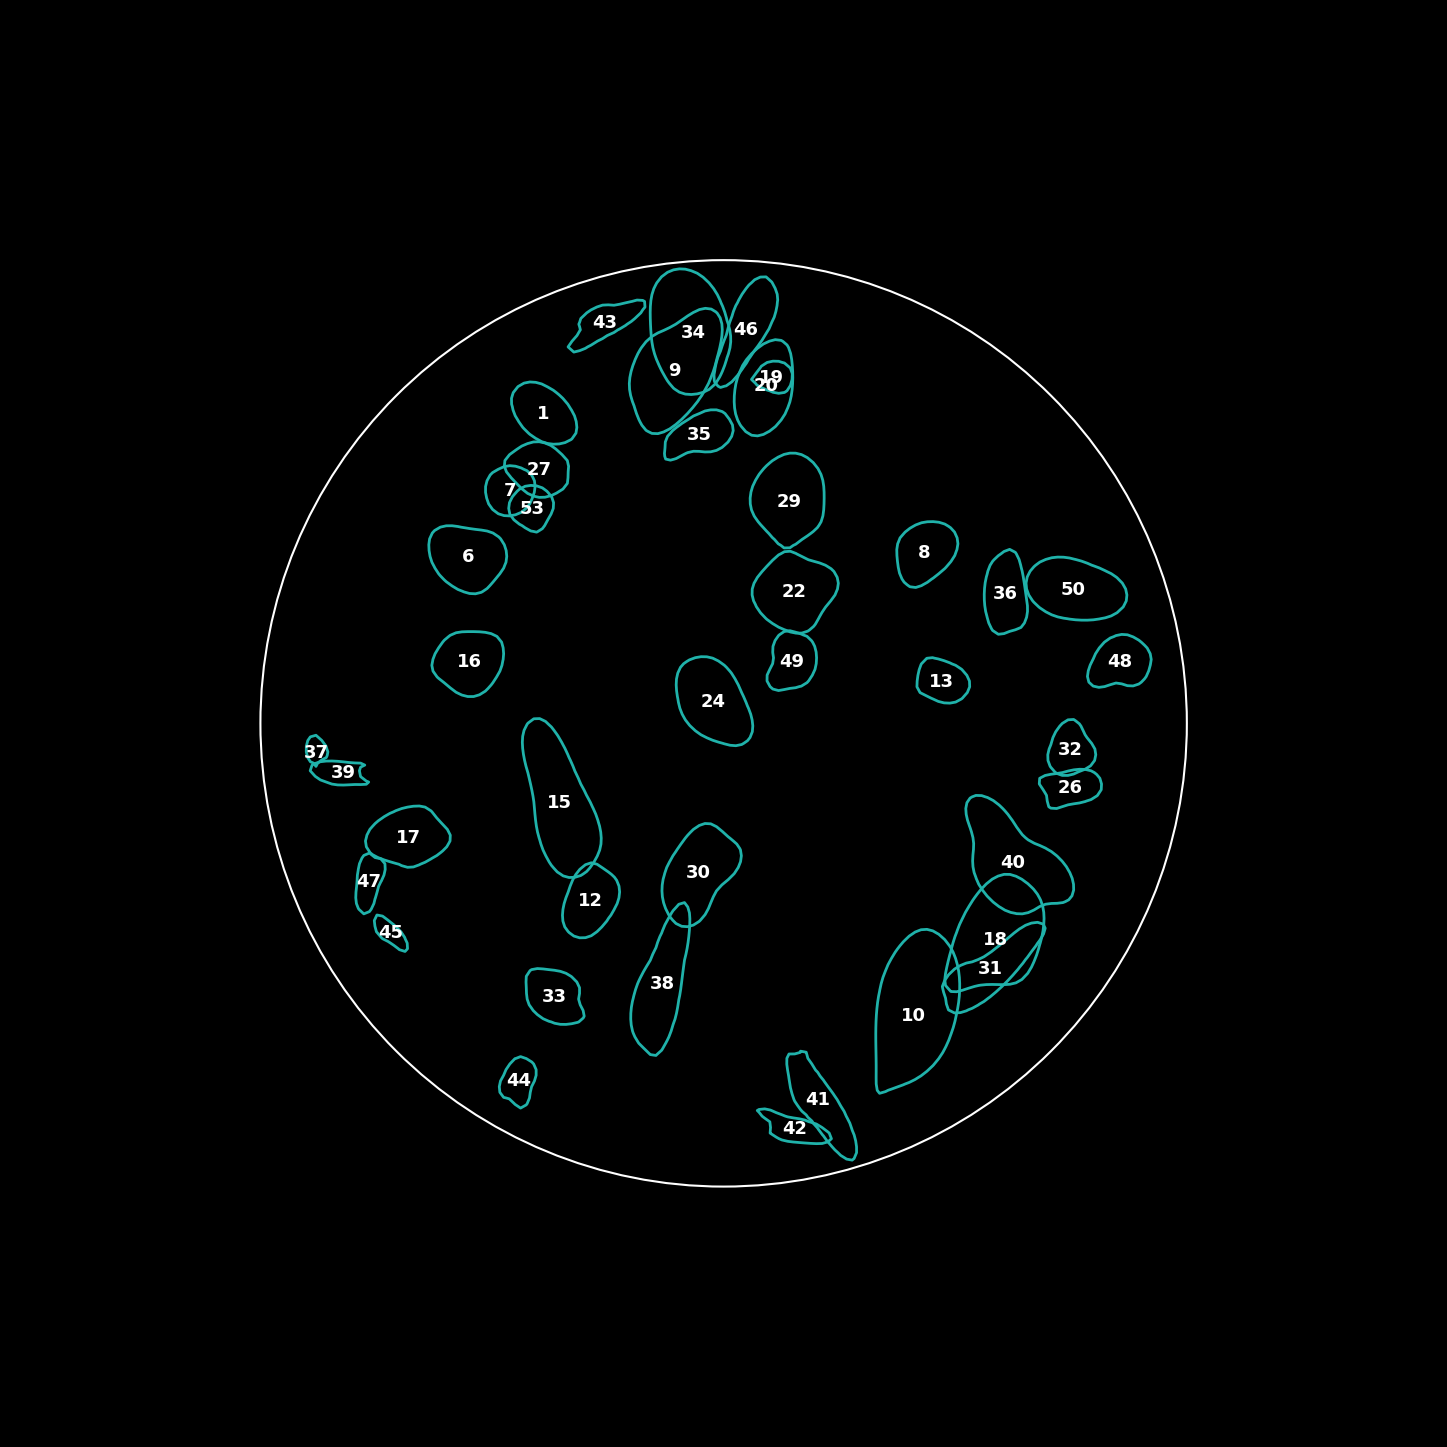

In [547]:
# RISK - ALL DOMAINS WITH OVERLAID IDS

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

for domain, nodes in sorted(risk_domain_to_labels_map.items()):
    node_ids = [graph.node_label_to_node_id_map[n] for n in nodes]
    # Extract node positions from the NetworkX graph (G)
    node_positions = np.array(
        [
            (graph.network.nodes[n]["x"], graph.network.nodes[n]["y"])
            for n in node_ids
            if n in graph.network.nodes
        ]
    )
    if len(node_positions) > 0:
        # Plot KDE-based contour for this domain
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=risk_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )

        # Compute centroid (mean x, mean y)
        centroid_x, centroid_y = node_positions.mean(axis=0)
        # Overlay domain ID at centroid
        plt.text(
            centroid_x,
            centroid_y,
            str(domain),
            color="white",
            fontsize=13,
            fontweight="bold",
            ha="center",
            va="center",
        )

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_5a.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

In [548]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
import numpy as np


def calculate_domain_enrichment_with_fdr(binary_matrix, domain_to_node, ordered_annotations):
    """
    Calculate the p-value and FDR for each domain, and return a dictionary mapping each domain to its statistics.
    """
    domain_enrichment = {}
    total_nodes, total_annotations = binary_matrix.shape
    all_p_values = []
    domain_pvalues = {}

    # Calculate p-values for all domains
    for domain, node_indices in domain_to_node.items():
        domain_pvalues[domain] = []
        for col in range(total_annotations):
            annotation_col = binary_matrix[:, col]
            total_annotated_nodes = np.sum(annotation_col)
            domain_annotated_nodes = np.sum(annotation_col[node_indices])

            # Hypergeometric test
            M = total_nodes  # Population size
            N = total_annotated_nodes  # Number of successes in population
            n = len(node_indices)  # Number of draws (nodes in the domain)
            x = domain_annotated_nodes  # Number of observed successes (domain-annotated nodes)

            p_value = hypergeom.sf(x - 1, M, N, n)
            domain_pvalues[domain].append((col, p_value))  # Store column index and p-value
            all_p_values.append(p_value)

    # Apply Benjamini-Hochberg FDR correction
    _, fdr_values, _, _ = multipletests(all_p_values, method="fdr_bh")

    # Assign FDR values back to domains and create output
    idx = 0
    for domain, p_vals in domain_pvalues.items():
        best_annotation = None
        min_p_value = float("inf")
        min_fdr = float("inf")

        for col, p_value in p_vals:
            fdr = fdr_values[idx]
            idx += 1

            # Find the annotation with the most significant enrichment
            if fdr < min_fdr or (fdr == min_fdr and p_value < min_p_value):
                min_fdr = fdr
                min_p_value = p_value
                best_annotation = ordered_annotations[col]

        # Store results for the domain
        domain_enrichment[domain] = {
            "term": best_annotation,
            "p-value": min_p_value,
            "FDR": min_fdr,
        }

    # Return the domain enrichment sorted by FDR
    sorted_enrichment = {
        domain: stats
        for domain, stats in sorted(domain_enrichment.items(), key=lambda item: item[1]["FDR"])
    }

    return sorted_enrichment


# Compute GO BP domain enrichment per domain (cluster)
risk_domain_enrichment_results = calculate_domain_enrichment_with_fdr(
    annotation["matrix"], risk_domain_to_ids_map, annotation["ordered_annotation"]
)

Num RISK domains to plot: 41


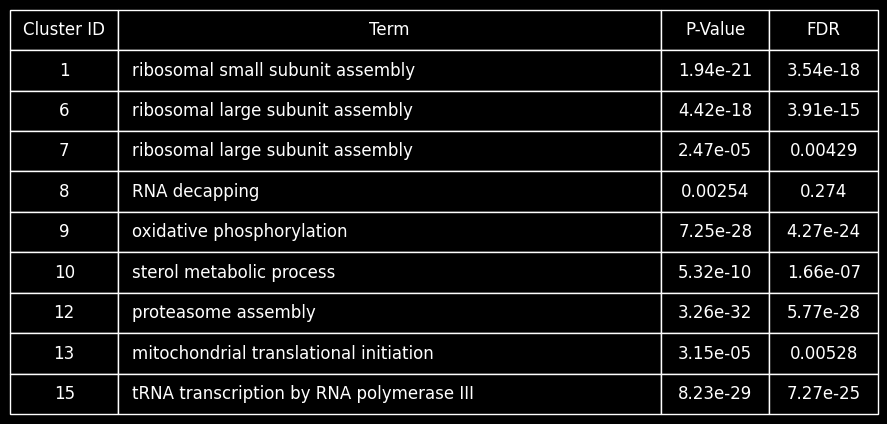

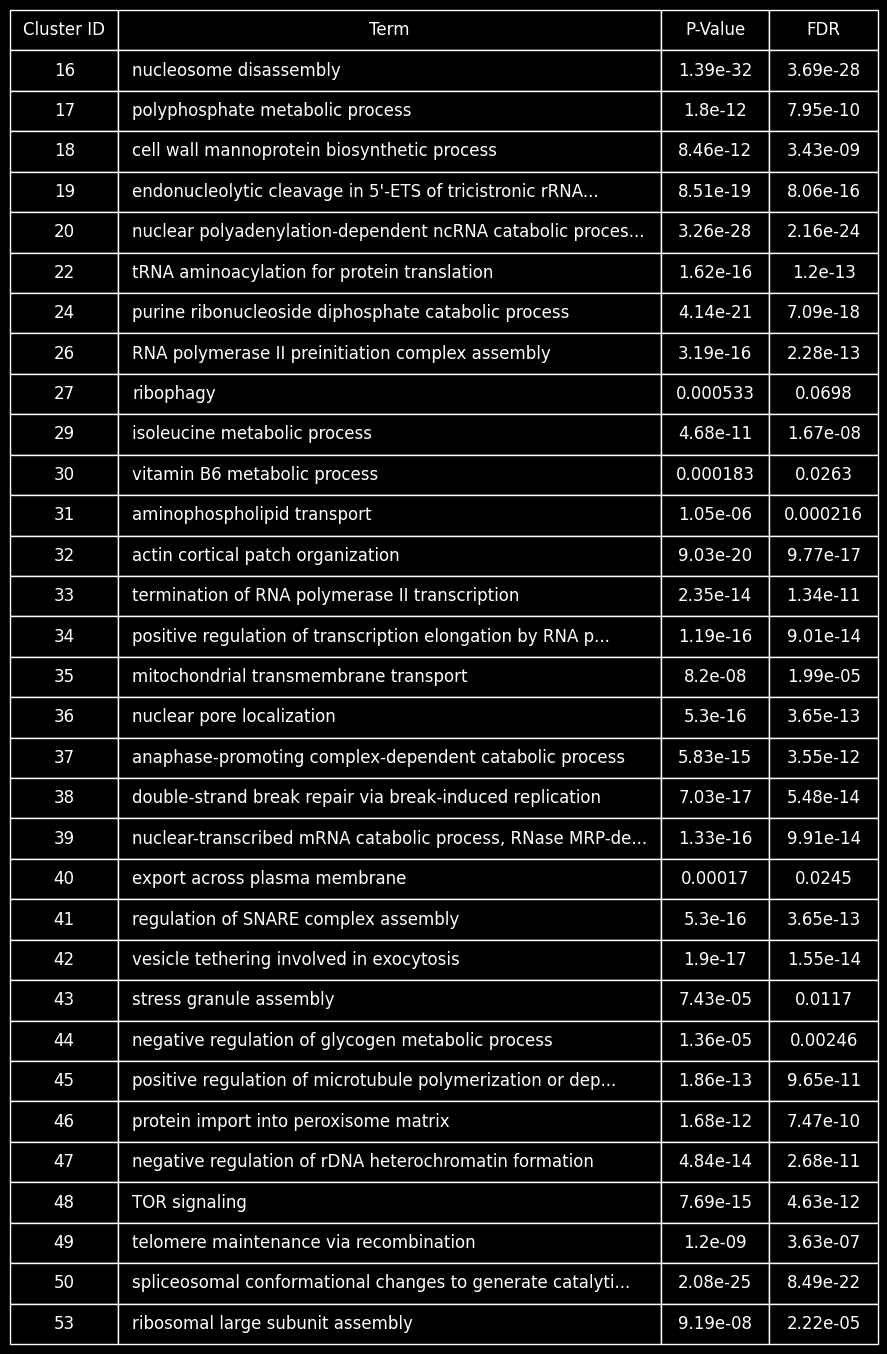

In [549]:
def plot_enrichment_table_from_dict(
    enrichment_data, start=0, stop=None, figsize=(7, 3), char_limit=75, filename=None
):
    """
    Plot an enrichment table from a dictionary of enrichment data with customizable row ranges.
    """
    # Convert dictionary to sorted list of rows (by FDR ascending)
    sorted_data = sorted(enrichment_data.items())
    # Slice the data based on start and stop
    sliced_data = sorted_data[start:stop]
    # Convert sliced data to table format with term clipping
    table_data = [
        [
            domain_id,
            (
                (stats["term"][:char_limit].strip() + "...")
                if len(stats["term"]) > char_limit
                else stats["term"]
            ),
            f"{stats['p-value']:.3g}",
            f"{stats['FDR']:.3g}",
        ]
        for domain_id, stats in sliced_data
    ]

    # Define column headers
    columns = ["Cluster ID", "Term", "P-Value", "FDR"]
    # Adjust column widths for a more compact layout
    column_widths = [0.2, 1, 0.2, 0.2]  # Decreased padding

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    # Create table with reduced padding
    table = ax.table(
        cellText=table_data,
        colLabels=columns,
        cellLoc="center",
        loc="center",
        colWidths=column_widths,
    )
    # Adjust font size for compactness
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    # Reduce row height for compactness
    row_height = 0.175

    for (i, j), cell in table.get_celld().items():
        cell.set_edgecolor("white")  # White borders for clarity
        cell.set_facecolor("black")  # Black background
        cell.set_text_props(color="white")  # White text for contrast
        cell.set_height(row_height)  # Reduce row height for compactness

        # Left justify content for the "Term" column (column index 1)
        if j == 1 and i > 0:  # Skip the header row
            cell.set_text_props(ha="left", va="center", color="white")

    def set_pad_for_column(col, pad=0.1):
        cells = table.get_celld()
        column = [cell for cell in table.get_celld() if cell[1] == col]
        for cell in column:
            cells[cell].PAD = pad

    # Apply reduced padding for the "Term" column (column index 1)
    set_pad_for_column(col=1, pad=0.025)
    # Add bold underline below headers only
    for j in range(len(columns)):
        table[0, j].set_linewidth(1)

    # Display the table
    if filename:
        plt.savefig(filename, bbox_inches="tight", dpi=1200)

    plt.show()


# Plot RISK enrichment table
print(f"Num RISK domains to plot: {len(risk_domain_enrichment_results)}")

# fmt:off
plot_enrichment_table_from_dict(risk_domain_enrichment_results, start=0, stop=9, char_limit=56, filename=None)  # filename="./png/supp_fig_5b1.png"
plot_enrichment_table_from_dict(risk_domain_enrichment_results, start=9, stop=1_000, char_limit=56, filename=None)  # filename="./png/supp_fig_5b2.png"

## Supplementary Figure S6

Most significantly enriched Gene Ontology Biological Process (GO BP) term identified by SAFE for each cluster in the yeast protein–protein interaction (PPI) network (Michaelis et al., 2023).  
Network visualization shows 22 SAFE-derived clusters outlined in red, with tables listing the top enriched GO BP term per cluster (Cluster ID, term, P-value, FDR).

---------------
Loading plotter
---------------


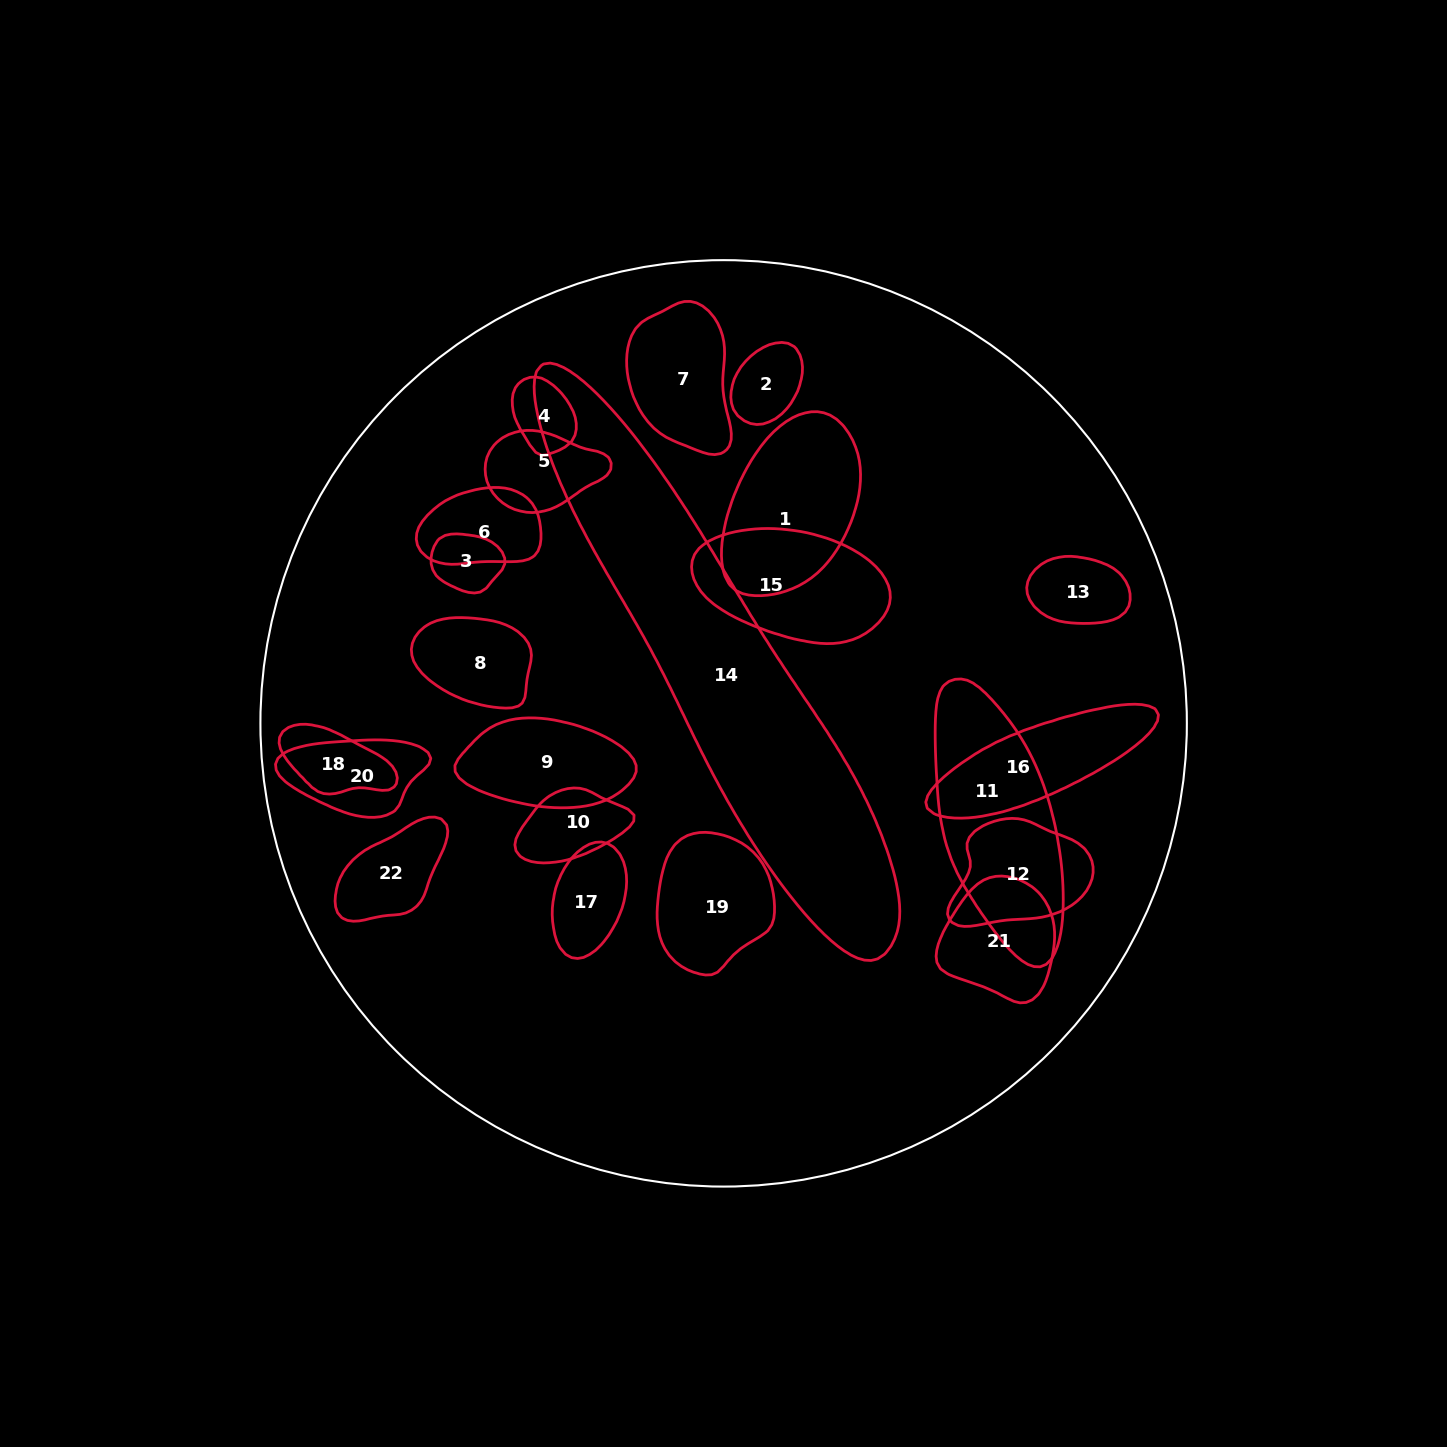

In [550]:
# SAFE - ALL DOMAINS WITH OVERLAID IDS

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

for domain, nodes in sorted(safe_domain_to_labels_map.items()):
    node_ids = [graph.node_label_to_node_id_map[n] for n in nodes]
    # Extract node positions from the NetworkX graph (G)
    node_positions = np.array(
        [
            (graph.network.nodes[n]["x"], graph.network.nodes[n]["y"])
            for n in node_ids
            if n in graph.network.nodes
        ]
    )
    if len(node_positions) > 0:
        # Plot KDE-based contour for this domain
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=safe_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )

        # Compute centroid (mean x, mean y)
        centroid_x, centroid_y = node_positions.mean(axis=0)
        # Overlay domain ID at centroid
        plt.text(
            centroid_x,
            centroid_y,
            str(domain),
            color="white",
            fontsize=13,
            fontweight="bold",
            ha="center",
            va="center",
        )

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/supp_fig_6a.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

In [551]:
# Compute GO BP domain enrichment per domain (cluster)

safe_domain_enrichment_results = calculate_domain_enrichment_with_fdr(
    annotation["matrix"], safe_domain_to_ids_map, annotation["ordered_annotation"]
)

Num SAFE domains to plot: 22


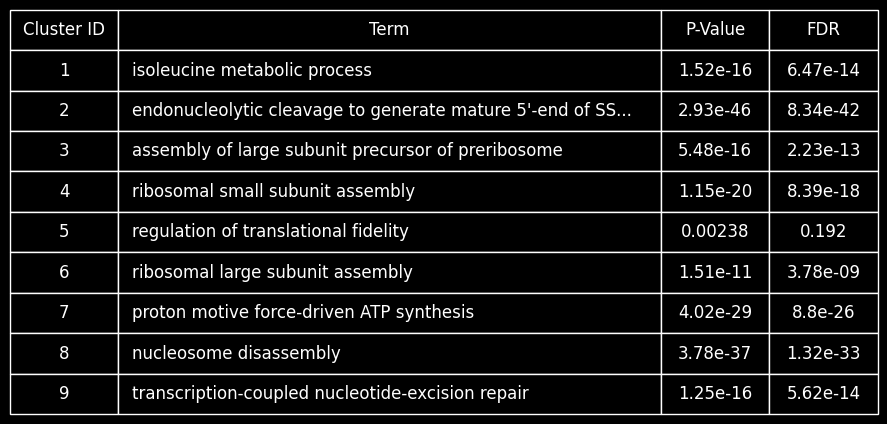

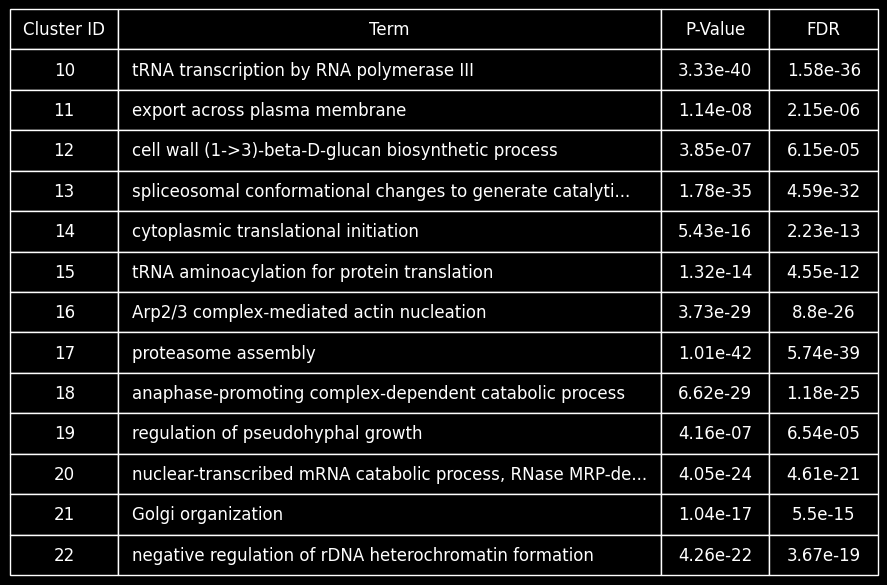

In [552]:
# Plot SAFE enrichment table

print(f"Num SAFE domains to plot: {len(safe_domain_enrichment_results)}")
plot_enrichment_table_from_dict(
    safe_domain_enrichment_results, start=0, stop=9, char_limit=56, filename=None, # filename="./png/supp_fig_6b1.png",
)  
plot_enrichment_table_from_dict(
    safe_domain_enrichment_results, start=9, stop=1_000, char_limit=56, filename=None, # filename="./png/supp_fig_6b2.png",
)